In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from numpy import mean
from numpy import std
from scipy.stats import sem
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RepeatedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [ ]:
communities_and_crime = fetch_ucirepo(id=183)

X = communities_and_crime.data.features
y = communities_and_crime.data.targets

In [ ]:
groups_df = X.join(y)

In [ ]:
groups_df = groups_df.replace('?', np.nan)

In [ ]:
groups_df["CrimeCategory"] = pd.cut(x=groups_df['ViolentCrimesPerPop'],
                     bins=[-0.1, 0.25, 0.40, 1],
                     labels=['Low', 'Medium', 'High'])

In [ ]:
race_make_up = groups_df[["racePctWhite", "racepctblack", "racePctAsian", "racePctHisp", "CrimeCategory"]]
age = groups_df[["agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "CrimeCategory"]]
urban_factors = groups_df[["numbUrban", "pctUrban", "CrimeCategory"]]
income_factors = groups_df[["medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", \
                            "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "CrimeCategory"]]
poverty = groups_df[["NumUnderPov", "PctPopUnderPov", "CrimeCategory"]]
education = groups_df[["PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "CrimeCategory"]]
employment = groups_df[["PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "CrimeCategory"]]
marriage_factors = groups_df[["MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "CrimeCategory"]]
domestic_factors = groups_df[["PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg",\
                              "PctIlleg", "CrimeCategory"]]
immigration = groups_df[["PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", \
                         "CrimeCategory"]]
english_proficiency = groups_df[["PctSpeakEnglOnly", "PctNotSpeakEnglWell", "CrimeCategory"]]
housing_factors = groups_df[["PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", \
                             "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "OwnOccLowQuart", "OwnOccMedVal", \
                             "OwnOccHiQuart", "PctHousLess3BR", "MedNumBR", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "CrimeCategory"]]
housing_cost = groups_df[["RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", \
                          "CrimeCategory"]]
unhoused = groups_df[["NumInShelters", "NumStreet", "CrimeCategory"]]
mobility = groups_df[["PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "CrimeCategory"]]
policing = groups_df[["LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", \
                      "PolicReqPerOffic", "PolicPerPop", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "PolicCars", "PolicOperBudg", \
                      "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "RacialMatchCommPol", "PctPolicWhite", \
                      "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "CrimeCategory"]]
density = groups_df[["LandArea", "PopDens", "CrimeCategory"]]
transit = groups_df[["PctUsePubTrans", "CrimeCategory"]]

# Group 1: Racial Make-Up of the Community

In [ ]:
race_make_up_features = race_make_up.iloc[:, :-1]
race_make_up_target = race_make_up.iloc[:, -1]
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(race_make_up_features, race_make_up_target, test_size=0.2, random_state=1)
classifier_1 = KNeighborsClassifier(n_neighbors=14)
classifier_1.fit(X_train_1, Y_train_1)

#From our initial test we can see that the f1 score is 0.5 but the MCC score is falling behind at 0.37.

y_pred_1 = classifier_1.predict(X_test_1)
print(classification_report(Y_test_1, y_pred_1))
print('Matthews:',matthews_corrcoef(Y_test_1, y_pred_1))

              precision    recall  f1-score   support

        High       0.50      0.56      0.53        62
         Low       0.80      0.91      0.85       270
      Medium       0.29      0.09      0.14        67

    accuracy                           0.72       399
   macro avg       0.53      0.52      0.50       399
weighted avg       0.66      0.72      0.68       399

Matthews: 0.3716650134705757


>1 f1=0.5364 se=0.013
>2 f1=0.5356 se=0.008
>3 f1=0.5379 se=0.007
>4 f1=0.5376 se=0.006
>5 f1=0.5393 se=0.005
>6 f1=0.5383 se=0.005
>7 f1=0.5374 se=0.004
>8 f1=0.5349 se=0.004
>9 f1=0.5346 se=0.004
>10 f1=0.5342 se=0.003
>11 f1=0.5349 se=0.003
>12 f1=0.5347 se=0.003
>13 f1=0.5349 se=0.003
>14 f1=0.5344 se=0.003
>15 f1=0.5347 se=0.003


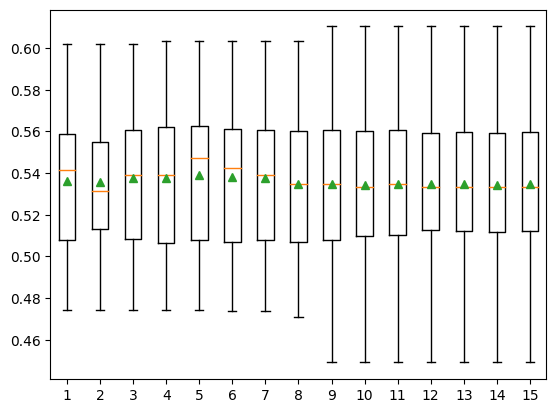

In [ ]:
#Based on the boxplot, I will be choosing 11 repeats.
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=14)
 scores_knn_1 = cross_val_score(model, race_make_up_features, race_make_up_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_1
repeats = range(1,16)
results_knn_1 = list()
for r in repeats:
 scores_knn_1 = evaluate_model(race_make_up_features, race_make_up_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_1), sem(scores_knn_1)))
 results_knn_1.append(scores_knn_1)

plt.boxplot(results_knn_1, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
#After optimizing the Stratified K-Fold, the f1 score and the MCC score are more closely aligned, indicating that cross-validation has improved the
#performance of the model.
classifier_sk_1 = KNeighborsClassifier(n_neighbors=14)
skf_knn_1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=11, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_1.split(race_make_up_features, race_make_up_target):
    x_train_fold, x_test_fold = race_make_up_features.iloc[train_index], race_make_up_features.iloc[test_index]
    y_train_fold, y_test_fold = race_make_up_target[train_index], race_make_up_target[test_index]
    classifier_sk_1.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_1.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_1.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_1, race_make_up_features, race_make_up_target, scoring='f1_macro', cv=skf_knn_1, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_1, race_make_up_features, race_make_up_target, scoring='matthews_corrcoef', cv=skf_knn_1, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))



Maximum Accuracy That can be obtained from this model is: 79.5 %

Minimum Accuracy: 70.0 %

Overall Accuracy: 75.10708085883965 %

Standard Deviation is: 0.02113102018852472
F1: 0.535 (0.035)
Matthews: 0.453 (0.049)


>1 f1=0.5362 se=0.015
>2 f1=0.5363 se=0.009
>3 f1=0.5381 se=0.007
>4 f1=0.5390 se=0.006
>5 f1=0.5360 se=0.005
>6 f1=0.5341 se=0.005
>7 f1=0.5337 se=0.004
>8 f1=0.5340 se=0.004
>9 f1=0.5334 se=0.004
>10 f1=0.5333 se=0.004
>11 f1=0.5340 se=0.003
>12 f1=0.5339 se=0.003
>13 f1=0.5345 se=0.003
>14 f1=0.5343 se=0.003
>15 f1=0.5344 se=0.003


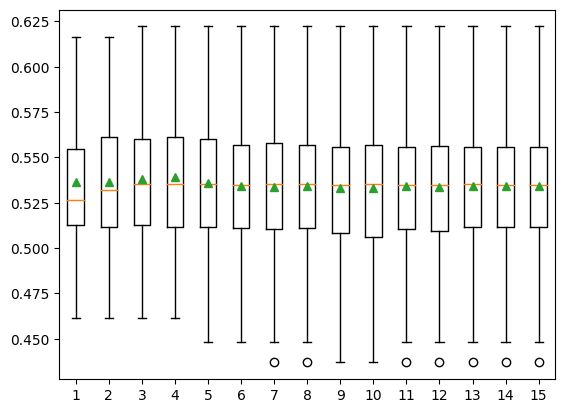

In [ ]:
#Based on the evaluation metrics, I will choose 5 repeats for the Repeated K-Fold
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=14)
 scores_knn_1 = cross_val_score(model, race_make_up_features, race_make_up_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_1
repeats = range(1,16)
results_knn_1 = list()
for r in repeats:
 scores_knn_1 = evaluate_model(race_make_up_features, race_make_up_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_1), sem(scores_knn_1)))
 results_knn_1.append(scores_knn_1)

plt.boxplot(results_knn_1, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
#The final f1 score and MCC scorees have remained relatively steady after cross-validation. I will now repeat this process with the same metrics for the next 17
#groups.
cv_1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores_f1 = cross_val_score(classifier_1, race_make_up_features, race_make_up_target, scoring='f1_macro', cv=cv_1, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_1, race_make_up_features, race_make_up_target, scoring='matthews_corrcoef', cv=cv_1, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.536 (0.037)
Matthews: 0.451 (0.058)


# Group 2: Age

In [ ]:
age_features = age.iloc[:, :-1]
age_target = age.iloc[:, -1]
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(age_features, age_target, test_size=0.2, random_state=1)
classifier_2 = KNeighborsClassifier(n_neighbors=15)
classifier_2.fit(X_train_2, Y_train_2)

#From our initial test we can see the f1 score is 0.42 and the MCC score is 0.23, which are not closely aligned.

y_pred_2 = classifier_2.predict(X_test_2)
print(classification_report(Y_test_2, y_pred_2))
print('Matthews:',matthews_corrcoef(Y_test_2, y_pred_2))

              precision    recall  f1-score   support

        High       0.35      0.40      0.38        62
         Low       0.76      0.87      0.81       270
      Medium       0.17      0.04      0.07        67

    accuracy                           0.66       399
   macro avg       0.43      0.44      0.42       399
weighted avg       0.60      0.66      0.62       399

Matthews: 0.2329429912558172


>1 f1=0.4104 se=0.012
>2 f1=0.4036 se=0.008
>3 f1=0.4069 se=0.006
>4 f1=0.4060 se=0.005
>5 f1=0.4065 se=0.004
>6 f1=0.4042 se=0.004
>7 f1=0.4048 se=0.003
>8 f1=0.4062 se=0.003
>9 f1=0.4059 se=0.003
>10 f1=0.4059 se=0.003
>11 f1=0.4054 se=0.003
>12 f1=0.4053 se=0.003
>13 f1=0.4052 se=0.002
>14 f1=0.4056 se=0.002
>15 f1=0.4057 se=0.002


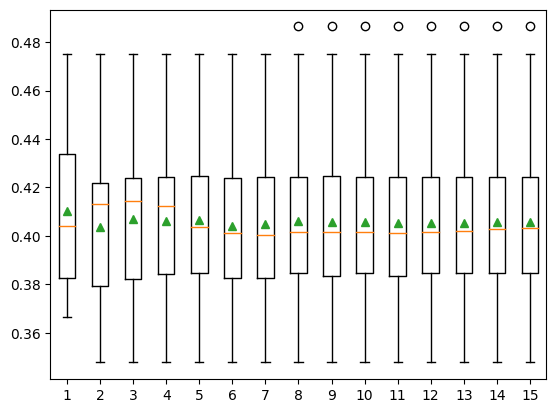

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=15)
 scores_knn_2 = cross_val_score(model, age_features, age_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_2
repeats = range(1,16)
results_knn_2 = list()
for r in repeats:
 scores_knn_2 = evaluate_model(age_features, age_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_2), sem(scores_knn_2)))
 results_knn_2.append(scores_knn_2)

plt.boxplot(results_knn_2, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_2 = KNeighborsClassifier(n_neighbors=15)
skf_knn_2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=15, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_2.split(age_features, age_target):
    x_train_fold, x_test_fold = age_features.iloc[train_index], age_features.iloc[test_index]
    y_train_fold, y_test_fold = age_target[train_index], age_target[test_index]
    classifier_sk_2.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_2.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_2.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_2, age_features, age_target, scoring='f1_macro', cv=skf_knn_2, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_2, age_features, age_target, scoring='matthews_corrcoef', cv=skf_knn_2, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 71.5 %

Minimum Accuracy: 60.5 %

Overall Accuracy: 66.75365159128978 %

Standard Deviation is: 0.021250491692959745
F1: 0.406 (0.028)
Matthews: 0.223 (0.050)


>1 f1=0.4046 se=0.009
>2 f1=0.4035 se=0.008
>3 f1=0.4037 se=0.006
>4 f1=0.4033 se=0.005
>5 f1=0.4034 se=0.004
>6 f1=0.4025 se=0.004
>7 f1=0.4025 se=0.004
>8 f1=0.4035 se=0.003
>9 f1=0.4032 se=0.003
>10 f1=0.4035 se=0.003
>11 f1=0.4034 se=0.003
>12 f1=0.4027 se=0.003
>13 f1=0.4020 se=0.003
>14 f1=0.4026 se=0.003
>15 f1=0.4021 se=0.003


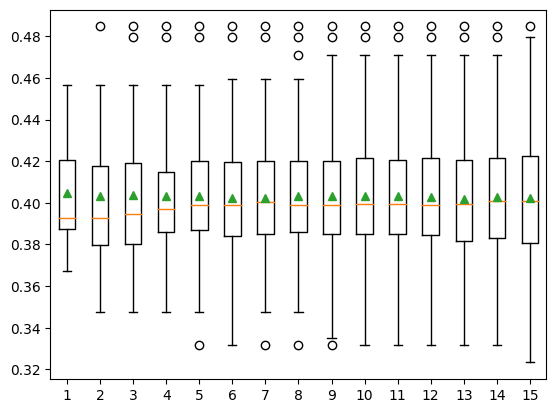

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=15)
 scores_knn_2 = cross_val_score(model, age_features, age_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_2
repeats = range(1,16)
results_knn_2 = list()
for r in repeats:
 scores_knn_2 = evaluate_model(age_features, age_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_2), sem(scores_knn_2)))
 results_knn_2.append(scores_knn_2)

plt.boxplot(results_knn_2, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_2 = RepeatedKFold(n_splits=10, n_repeats=15, random_state=1)
scores_f1 = cross_val_score(classifier_2, age_features, age_target, scoring='f1_macro', cv=cv_2, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_1, age_features, age_target, scoring='matthews_corrcoef', cv=cv_2, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


F1: 0.402 (0.031)
Matthews: 0.218 (0.049)


# Group 3: Urban Factors

In [ ]:
urban_factors_features = urban_factors.iloc[:, :-1]
urban_factors_target = urban_factors.iloc[:, -1]
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(urban_factors_features, urban_factors_target, test_size=0.2, random_state=1)
classifier_3 = KNeighborsClassifier(n_neighbors=20)
classifier_3.fit(X_train_3, Y_train_3)

#Starting f1 is 0.43, starting MCC is 0.29

y_pred_3 = classifier_3.predict(X_test_3)
print(classification_report(Y_test_3, y_pred_3))
print('Matthews:',matthews_corrcoef(Y_test_3, y_pred_3))

              precision    recall  f1-score   support

        High       0.67      0.26      0.37        62
         Low       0.72      0.99      0.83       270
      Medium       1.00      0.04      0.09        67

    accuracy                           0.71       399
   macro avg       0.79      0.43      0.43       399
weighted avg       0.76      0.71      0.63       399

Matthews: 0.29171309092878245


>1 f1=0.3773 se=0.011
>2 f1=0.3790 se=0.006
>3 f1=0.3802 se=0.005
>4 f1=0.3786 se=0.005
>5 f1=0.3798 se=0.005
>6 f1=0.3802 se=0.005
>7 f1=0.3804 se=0.004
>8 f1=0.3811 se=0.004
>9 f1=0.3816 se=0.004
>10 f1=0.3820 se=0.004
>11 f1=0.3818 se=0.003
>12 f1=0.3815 se=0.003
>13 f1=0.3814 se=0.003
>14 f1=0.3822 se=0.003
>15 f1=0.3823 se=0.003


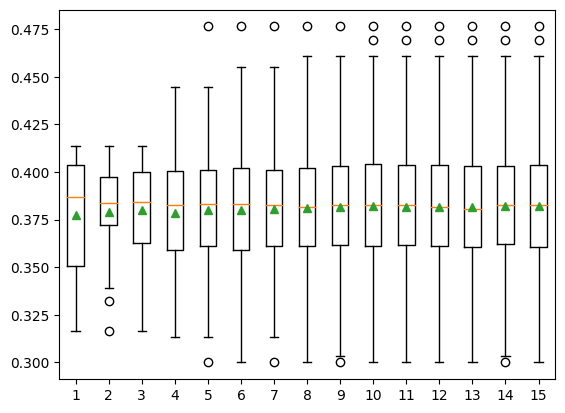

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=20)
 scores_knn_3 = cross_val_score(model, urban_factors_features, urban_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_3
repeats = range(1,16)
results_knn_3 = list()
for r in repeats:
 scores_knn_3 = evaluate_model(urban_factors_features, urban_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_3), sem(scores_knn_3)))
 results_knn_3.append(scores_knn_3)

plt.boxplot(results_knn_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_3 = KNeighborsClassifier(n_neighbors=20)
skf_knn_3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_3.split(urban_factors_features, urban_factors_target):
    x_train_fold, x_test_fold = urban_factors_features.iloc[train_index], urban_factors_features.iloc[test_index]
    y_train_fold, y_test_fold = urban_factors_target[train_index], urban_factors_target[test_index]
    classifier_sk_3.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_3.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_3.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_3, urban_factors_features, urban_factors_target, scoring='f1_macro', cv=skf_knn_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_3, urban_factors_features, urban_factors_target, scoring='matthews_corrcoef', cv=skf_knn_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 72.8643216080402 %

Minimum Accuracy: 58.5 %

Overall Accuracy: 69.0287688442211 %

Standard Deviation is: 0.022289225417875754
F1: 0.381 (0.034)
Matthews: 0.220 (0.065)


>1 f1=0.3705 se=0.011
>2 f1=0.3773 se=0.009
>3 f1=0.3781 se=0.006
>4 f1=0.3797 se=0.006
>5 f1=0.3819 se=0.005
>6 f1=0.3825 se=0.004
>7 f1=0.3828 se=0.004
>8 f1=0.3816 se=0.004
>9 f1=0.3821 se=0.003
>10 f1=0.3824 se=0.003
>11 f1=0.3828 se=0.003
>12 f1=0.3833 se=0.003
>13 f1=0.3831 se=0.003
>14 f1=0.3832 se=0.003
>15 f1=0.3829 se=0.003


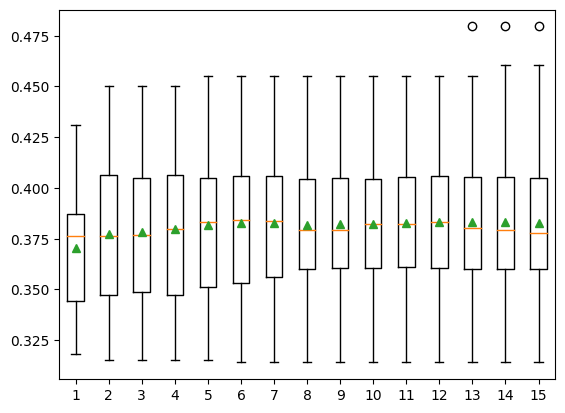

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=20)
 scores_knn_3 = cross_val_score(model, urban_factors_features, urban_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_3
repeats = range(1,16)
results_knn_3 = list()
for r in repeats:
 scores_knn_3 = evaluate_model(urban_factors_features, urban_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_3), sem(scores_knn_3)))
 results_knn_3.append(scores_knn_3)

plt.boxplot(results_knn_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_3 = RepeatedKFold(n_splits=10, n_repeats=12, random_state=1)
scores_f1 = cross_val_score(classifier_3, urban_factors_features, urban_factors_target, scoring='f1_macro', cv=cv_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_3, urban_factors_features, urban_factors_target, scoring='matthews_corrcoef', cv=cv_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


F1: 0.383 (0.032)
Matthews: 0.223 (0.061)


# Group 4: Income Factors

In [ ]:
#Income factors has 1 NA value as discovered in preprocessing, here I am replacing it with another value from the same column. Because there is only one missing
#value it should not have a great impact on the model.
income_factors.fillna(income_factors.select_dtypes(include='object').mode().iloc[0], inplace=True)
income_factors.isna().sum()

<ipython-input-23-65d4316290ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_factors.fillna(income_factors.select_dtypes(include='object').mode().iloc[0], inplace=True)


medIncome        0
pctWWage         0
pctWFarmSelf     0
pctWInvInc       0
pctWSocSec       0
pctWPubAsst      0
pctWRetire       0
medFamInc        0
perCapInc        0
whitePerCap      0
blackPerCap      0
indianPerCap     0
AsianPerCap      0
OtherPerCap      0
HispPerCap       0
CrimeCategory    0
dtype: int64

In [ ]:
income_factors_features = income_factors.iloc[:, :-1]
income_factors_target = income_factors.iloc[:, -1]
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(income_factors_features, income_factors_target, test_size=0.2, random_state=1)
classifier_4 = KNeighborsClassifier(n_neighbors=3)
classifier_4.fit(X_train_4, Y_train_4)

#Starting f1 is 0.54, starting MCC is 0.40

y_pred_4 = classifier_4.predict(X_test_4)
print(classification_report(Y_test_4, y_pred_4))
print('Matthews:',matthews_corrcoef(Y_test_4, y_pred_4))

              precision    recall  f1-score   support

        High       0.42      0.65      0.51        62
         Low       0.82      0.85      0.84       270
      Medium       0.52      0.19      0.28        67

    accuracy                           0.71       399
   macro avg       0.59      0.56      0.54       399
weighted avg       0.71      0.71      0.69       399

Matthews: 0.3979369589985626


>1 f1=0.5266 se=0.013
>2 f1=0.5286 se=0.009
>3 f1=0.5286 se=0.007
>4 f1=0.5274 se=0.005
>5 f1=0.5292 se=0.005
>6 f1=0.5289 se=0.005
>7 f1=0.5298 se=0.004
>8 f1=0.5296 se=0.004
>9 f1=0.5302 se=0.004
>10 f1=0.5302 se=0.004
>11 f1=0.5300 se=0.003
>12 f1=0.5299 se=0.003
>13 f1=0.5304 se=0.003
>14 f1=0.5308 se=0.003
>15 f1=0.5307 se=0.003


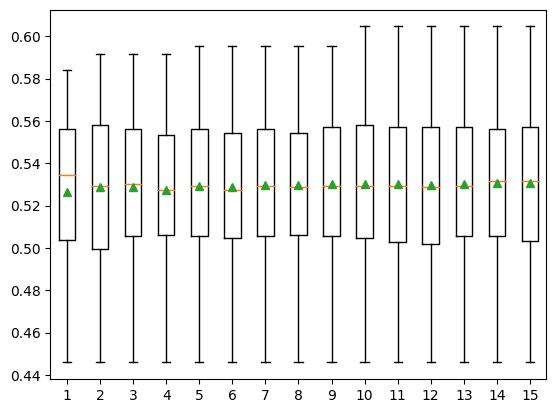

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_4 = cross_val_score(model, income_factors_features, income_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_4
repeats = range(1,16)
results_knn_4 = list()
for r in repeats:
 scores_knn_4 = evaluate_model(income_factors_features, income_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_4), sem(scores_knn_4)))
 results_knn_4.append(scores_knn_4)

plt.boxplot(results_knn_4, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_4 = KNeighborsClassifier(n_neighbors=3)
skf_knn_4 = RepeatedStratifiedKFold(n_splits=10, n_repeats=11, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_4.split(income_factors_features, income_factors_target):
    x_train_fold, x_test_fold = income_factors_features.iloc[train_index], income_factors_features.iloc[test_index]
    y_train_fold, y_test_fold = income_factors_target[train_index], income_factors_target[test_index]
    classifier_sk_4.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_4.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_4.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_4, income_factors_features, income_factors_target, scoring='f1_macro', cv=skf_knn_4, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_4, income_factors_features, income_factors_target, scoring='matthews_corrcoef', cv=skf_knn_4, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 76.5 %

Minimum Accuracy: 64.82412060301507 %

Overall Accuracy: 70.9773412517131 %

Standard Deviation is: 0.023921971990109106
F1: 0.530 (0.036)
Matthews: 0.411 (0.046)


>1 f1=0.5188 se=0.015
>2 f1=0.5293 se=0.010
>3 f1=0.5287 se=0.008
>4 f1=0.5288 se=0.006
>5 f1=0.5288 se=0.005
>6 f1=0.5285 se=0.005
>7 f1=0.5290 se=0.004
>8 f1=0.5289 se=0.004
>9 f1=0.5293 se=0.004
>10 f1=0.5297 se=0.003
>11 f1=0.5300 se=0.003
>12 f1=0.5299 se=0.003
>13 f1=0.5295 se=0.003
>14 f1=0.5299 se=0.003
>15 f1=0.5299 se=0.003


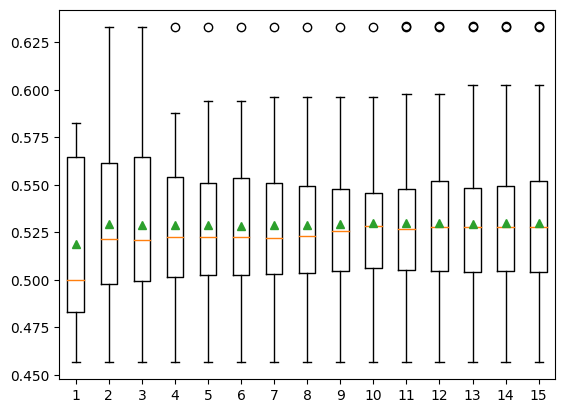

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_4 = cross_val_score(model, income_factors_features, income_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_4
repeats = range(1,16)
results_knn_4 = list()
for r in repeats:
 scores_knn_4 = evaluate_model(income_factors_features, income_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_4), sem(scores_knn_4)))
 results_knn_4.append(scores_knn_4)

plt.boxplot(results_knn_4, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_4 = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores_f1 = cross_val_score(classifier_4, income_factors_features, income_factors_target, scoring='f1_macro', cv=cv_4, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_4, income_factors_features, income_factors_target, scoring='matthews_corrcoef', cv=cv_4, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.530 (0.034)
Matthews: 0.410 (0.048)


# Group 5: Poverty

In [ ]:
poverty_features = poverty.iloc[:, :-1]
poverty_target = poverty.iloc[:, -1]
X_train_5, X_test_5, Y_train_5, Y_test_5 = train_test_split(poverty_features, poverty_target, test_size=0.2, random_state=1)

classifier_5 = KNeighborsClassifier(n_neighbors=38)
classifier_5.fit(X_train_5, Y_train_5)

#Starting f1 is 0.49, starting MCC is 0.40

y_pred_5 = classifier_5.predict(X_test_5)
print(classification_report(Y_test_5, y_pred_5))
print('Matthews:',matthews_corrcoef(Y_test_5, y_pred_5))

              precision    recall  f1-score   support

        High       0.62      0.60      0.61        62
         Low       0.76      0.96      0.85       270
      Medium       0.00      0.00      0.00        67

    accuracy                           0.74       399
   macro avg       0.46      0.52      0.49       399
weighted avg       0.61      0.74      0.67       399

Matthews: 0.40580141205424297


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>1 f1=0.4561 se=0.011
>2 f1=0.4535 se=0.006
>3 f1=0.4535 se=0.004
>4 f1=0.4529 se=0.004
>5 f1=0.4532 se=0.003
>6 f1=0.4527 se=0.003
>7 f1=0.4529 se=0.003
>8 f1=0.4526 se=0.003
>9 f1=0.4533 se=0.003
>10 f1=0.4537 se=0.003
>11 f1=0.4544 se=0.002
>12 f1=0.4548 se=0.002
>13 f1=0.4543 se=0.002
>14 f1=0.4545 se=0.002
>15 f1=0.4543 se=0.002


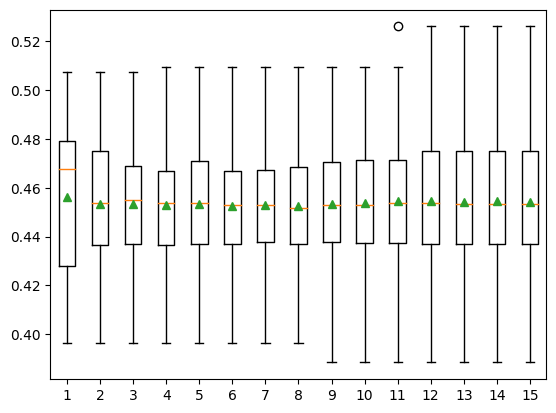

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=38)
 scores_knn_5 = cross_val_score(model, poverty_features, income_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_5
repeats = range(1,16)
results_knn_5 = list()
for r in repeats:
 scores_knn_5 = evaluate_model(poverty_features, income_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_5), sem(scores_knn_5)))
 results_knn_5.append(scores_knn_5)

plt.boxplot(results_knn_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_5 = KNeighborsClassifier(n_neighbors=38)
skf_knn_5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=13, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_5.split(poverty_features, income_factors_target):
    x_train_fold, x_test_fold = poverty_features.iloc[train_index], poverty_features.iloc[test_index]
    y_train_fold, y_test_fold = poverty_target[train_index], poverty_target[test_index]
    classifier_sk_5.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_5.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_5.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_5, poverty_features, poverty_target, scoring='f1_macro', cv=skf_knn_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_5, poverty_features, poverty_target, scoring='matthews_corrcoef', cv=skf_knn_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 76.88442211055276 %

Minimum Accuracy: 67.8391959798995 %

Overall Accuracy: 72.14014302280634 %

Standard Deviation is: 0.018193620443311336
F1: 0.454 (0.025)
Matthews: 0.354 (0.050)


>1 f1=0.4525 se=0.009
>2 f1=0.4503 se=0.007
>3 f1=0.4511 se=0.005
>4 f1=0.4543 se=0.004
>5 f1=0.4540 se=0.003
>6 f1=0.4546 se=0.003
>7 f1=0.4560 se=0.003
>8 f1=0.4560 se=0.003
>9 f1=0.4552 se=0.003
>10 f1=0.4545 se=0.003
>11 f1=0.4538 se=0.003
>12 f1=0.4535 se=0.002
>13 f1=0.4534 se=0.002
>14 f1=0.4538 se=0.002
>15 f1=0.4540 se=0.002


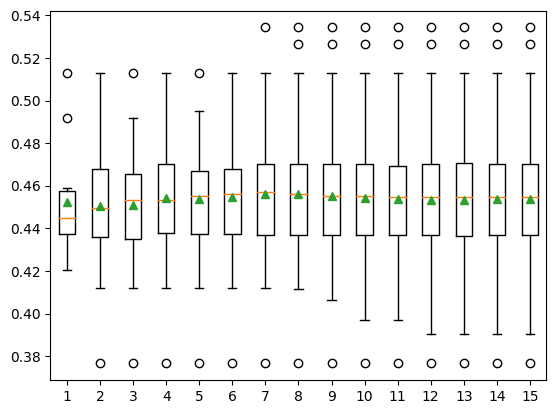

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=38)
 scores_knn_5 = cross_val_score(model, poverty_features, income_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_5
repeats = range(1,16)
results_knn_5 = list()
for r in repeats:
 scores_knn_5 = evaluate_model(poverty_features, income_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_5), sem(scores_knn_5)))
 results_knn_5.append(scores_knn_5)

plt.boxplot(results_knn_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_5 = RepeatedKFold(n_splits=10, n_repeats=8, random_state=1)
scores_f1 = cross_val_score(classifier_5, poverty_features, poverty_target, scoring='f1_macro', cv=cv_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_5, poverty_features, poverty_target, scoring='matthews_corrcoef', cv=cv_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.456 (0.028)
Matthews: 0.358 (0.056)


# Group 6: Education

In [ ]:
education_features = education.iloc[:, :-1]
education_target = education.iloc[:, -1]
X_train_6, X_test_6, Y_train_6, Y_test_6 = train_test_split(education_features, education_target, test_size=0.2, random_state=1)

classifier_6 = KNeighborsClassifier(n_neighbors=4)
classifier_6.fit(X_train_6, Y_train_6)

#Starting f1 is 0.46, starting MCC is 0.27

y_pred_6 = classifier_6.predict(X_test_6)
print(classification_report(Y_test_6, y_pred_6))
print('Matthews:',matthews_corrcoef(Y_test_6, y_pred_6))



              precision    recall  f1-score   support

        High       0.37      0.47      0.41        62
         Low       0.76      0.86      0.81       270
      Medium       0.39      0.10      0.16        67

    accuracy                           0.67       399
   macro avg       0.51      0.48      0.46       399
weighted avg       0.64      0.67      0.64       399

Matthews: 0.2709155728783489


>1 f1=0.4422 se=0.009
>2 f1=0.4469 se=0.007
>3 f1=0.4464 se=0.006
>4 f1=0.4484 se=0.005
>5 f1=0.4463 se=0.004
>6 f1=0.4463 se=0.004
>7 f1=0.4461 se=0.004
>8 f1=0.4476 se=0.004
>9 f1=0.4478 se=0.004
>10 f1=0.4478 se=0.003
>11 f1=0.4475 se=0.003
>12 f1=0.4469 se=0.003
>13 f1=0.4457 se=0.003
>14 f1=0.4452 se=0.003
>15 f1=0.4444 se=0.003


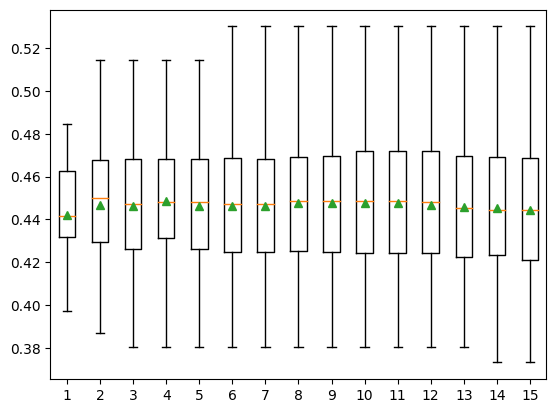

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=4)
 scores_knn_6 = cross_val_score(model, education_features, education_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_6
repeats = range(1,16)
results_knn_6 = list()
for r in repeats:
 scores_knn_6 = evaluate_model(education_features, education_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_6), sem(scores_knn_6)))
 results_knn_6.append(scores_knn_6)

plt.boxplot(results_knn_6, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_6 = KNeighborsClassifier(n_neighbors=4)
skf_knn_6 = RepeatedStratifiedKFold(n_splits=10, n_repeats=13, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_6.split(education_features, education_target):
    x_train_fold, x_test_fold = education_features.iloc[train_index], education_features.iloc[test_index]
    y_train_fold, y_test_fold = education_target[train_index], education_target[test_index]
    classifier_sk_6.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_6.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_6.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_6, education_features, education_target, scoring='f1_macro', cv=skf_knn_6, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_6, education_features, education_target, scoring='matthews_corrcoef', cv=skf_knn_6, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 72.8643216080402 %

Minimum Accuracy: 61.0 %

Overall Accuracy: 65.68556242752223 %

Standard Deviation is: 0.021351717517144497
F1: 0.446 (0.033)
Matthews: 0.251 (0.050)


>1 f1=0.4526 se=0.008
>2 f1=0.4472 se=0.005
>3 f1=0.4438 se=0.005
>4 f1=0.4454 se=0.005
>5 f1=0.4448 se=0.004
>6 f1=0.4439 se=0.004
>7 f1=0.4435 se=0.003
>8 f1=0.4432 se=0.003
>9 f1=0.4432 se=0.003
>10 f1=0.4430 se=0.003
>11 f1=0.4430 se=0.003
>12 f1=0.4436 se=0.003
>13 f1=0.4440 se=0.003
>14 f1=0.4439 se=0.003
>15 f1=0.4440 se=0.003


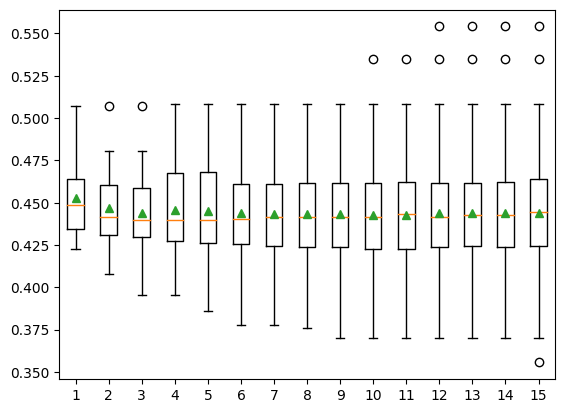

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=4)
 scores_knn_6 = cross_val_score(model, education_features, education_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_6
repeats = range(1,16)
results_knn_6 = list()
for r in repeats:
 scores_knn_6 = evaluate_model(education_features, education_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_6), sem(scores_knn_6)))
 results_knn_6.append(scores_knn_6)

plt.boxplot(results_knn_6, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_6 = RepeatedKFold(n_splits=10, n_repeats=9, random_state=1)
scores_f1 = cross_val_score(classifier_6, education_features, education_target, scoring='f1_macro', cv=cv_6, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_6, education_features, education_target, scoring='matthews_corrcoef', cv=cv_6, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.443 (0.031)
Matthews: 0.249 (0.052)


# Group 7: Employment

In [ ]:
employment_features = employment.iloc[:, :-1]
employment_target = employment.iloc[:, -1]
X_train_7, X_test_7, Y_train_7, Y_test_7 = train_test_split(employment_features, employment_target, test_size=0.2, random_state=1)

In [ ]:
classifier_7 = KNeighborsClassifier(n_neighbors=30)
classifier_7.fit(X_train_7, Y_train_7)

#Starting f1 is 0.44, starting MCC is 0.29

y_pred_7 = classifier_7.predict(X_test_7)
print(classification_report(Y_test_7, y_pred_7))
print('Matthews:',matthews_corrcoef(Y_test_7, y_pred_7))

              precision    recall  f1-score   support

        High       0.39      0.47      0.43        62
         Low       0.76      0.90      0.83       270
      Medium       0.40      0.03      0.06        67

    accuracy                           0.69       399
   macro avg       0.52      0.47      0.44       399
weighted avg       0.64      0.69      0.64       399

Matthews: 0.29096995493742384


>1 f1=0.4271 se=0.012
>2 f1=0.4294 se=0.010
>3 f1=0.4263 se=0.007
>4 f1=0.4229 se=0.007
>5 f1=0.4231 se=0.006
>6 f1=0.4233 se=0.005
>7 f1=0.4224 se=0.004
>8 f1=0.4215 se=0.004
>9 f1=0.4216 se=0.004
>10 f1=0.4216 se=0.004
>11 f1=0.4213 se=0.003
>12 f1=0.4214 se=0.003
>13 f1=0.4216 se=0.003
>14 f1=0.4213 se=0.003
>15 f1=0.4201 se=0.003


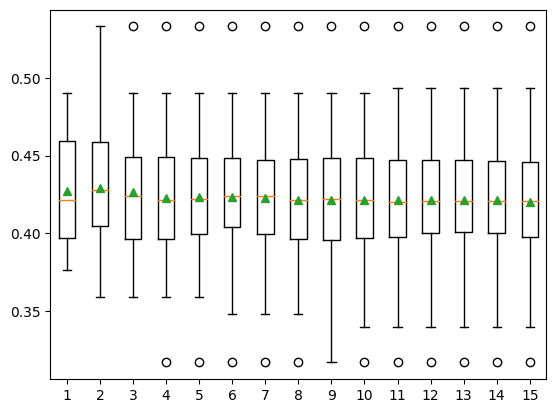

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=30)
 scores_knn_7 = cross_val_score(model, employment_features, employment_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_7
repeats = range(1,16)
results_knn_7 = list()
for r in repeats:
 scores_knn_7 = evaluate_model(employment_features, employment_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_7), sem(scores_knn_7)))
 results_knn_7.append(scores_knn_7)

plt.boxplot(results_knn_7, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_7 = KNeighborsClassifier(n_neighbors=30)
skf_knn_7 = RepeatedStratifiedKFold(n_splits=10, n_repeats=13, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_7.split(employment_features, employment_target):
    x_train_fold, x_test_fold = employment_features.iloc[train_index], employment_features.iloc[test_index]
    y_train_fold, y_test_fold = employment_target[train_index], employment_target[test_index]
    classifier_sk_7.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_7.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_7.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_7, employment_features, employment_target, scoring='f1_macro', cv=skf_knn_7, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_7, employment_features, employment_target, scoring='matthews_corrcoef', cv=skf_knn_7, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 74.5 %

Minimum Accuracy: 64.321608040201 %

Overall Accuracy: 69.11894085813684 %

Standard Deviation is: 0.021260400887543388
F1: 0.422 (0.034)
Matthews: 0.268 (0.060)


>1 f1=0.4215 se=0.006
>2 f1=0.4229 se=0.006
>3 f1=0.4224 se=0.005
>4 f1=0.4219 se=0.005
>5 f1=0.4227 se=0.005
>6 f1=0.4239 se=0.004
>7 f1=0.4226 se=0.004
>8 f1=0.4220 se=0.004
>9 f1=0.4223 se=0.004
>10 f1=0.4212 se=0.003
>11 f1=0.4213 se=0.003
>12 f1=0.4212 se=0.003
>13 f1=0.4213 se=0.003
>14 f1=0.4219 se=0.003
>15 f1=0.4219 se=0.003


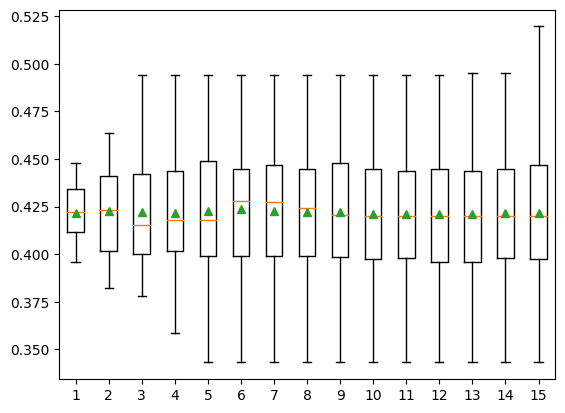

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=30)
 scores_knn_7 = cross_val_score(model, employment_features, employment_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_7
repeats = range(1,16)
results_knn_7 = list()
for r in repeats:
 scores_knn_7 = evaluate_model(employment_features, employment_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_7), sem(scores_knn_7)))
 results_knn_7.append(scores_knn_7)

plt.boxplot(results_knn_7, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_7 = RepeatedKFold(n_splits=10, n_repeats=13, random_state=1)
scores_f1 = cross_val_score(classifier_7, employment_features, employment_target, scoring='f1_macro', cv=cv_7, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_7, employment_features, employment_target, scoring='matthews_corrcoef', cv=cv_7, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.421 (0.034)
Matthews: 0.269 (0.055)


# Group 8: Marriage Factors

In [ ]:
marriage_factors_features = marriage_factors.iloc[:, :-1]
marriage_factors_target = marriage_factors.iloc[:, -1]
X_train_8, X_test_8, Y_train_8, Y_test_8 = train_test_split(marriage_factors_features, marriage_factors_target, test_size=0.2, random_state=1)

classifier_8 = KNeighborsClassifier(n_neighbors=20)
classifier_8.fit(X_train_8, Y_train_8)

#Starting f1 is 0.48, starting MCC is 0.37

y_pred_8 = classifier_8.predict(X_test_8)
print(classification_report(Y_test_8, y_pred_8))
print('Matthews:',matthews_corrcoef(Y_test_8, y_pred_8))

              precision    recall  f1-score   support

        High       0.50      0.63      0.56        62
         Low       0.77      0.91      0.84       270
      Medium       1.00      0.03      0.06        67

    accuracy                           0.72       399
   macro avg       0.76      0.52      0.48       399
weighted avg       0.77      0.72      0.66       399

Matthews: 0.37001572975359515


>1 f1=0.4538 se=0.007
>2 f1=0.4520 se=0.008
>3 f1=0.4513 se=0.006
>4 f1=0.4501 se=0.005
>5 f1=0.4500 se=0.004
>6 f1=0.4509 se=0.004
>7 f1=0.4508 se=0.003
>8 f1=0.4505 se=0.003
>9 f1=0.4509 se=0.003
>10 f1=0.4503 se=0.003
>11 f1=0.4509 se=0.003
>12 f1=0.4513 se=0.002
>13 f1=0.4519 se=0.002
>14 f1=0.4520 se=0.002
>15 f1=0.4518 se=0.002


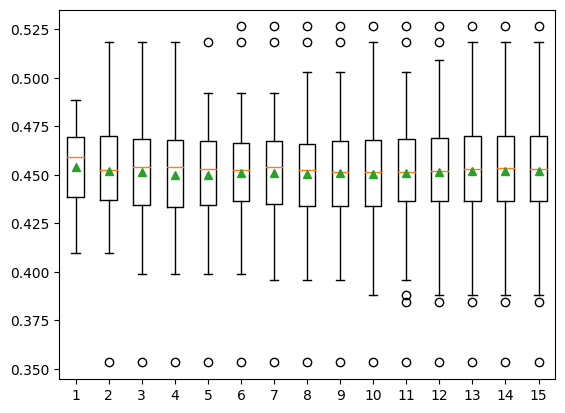

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=20)
 scores_knn_8 = cross_val_score(model, marriage_factors_features, marriage_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_8
repeats = range(1,16)
results_knn_8 = list()
for r in repeats:
 scores_knn_8 = evaluate_model(marriage_factors_features, marriage_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_8), sem(scores_knn_8)))
 results_knn_8.append(scores_knn_8)

plt.boxplot(results_knn_8, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_8 = KNeighborsClassifier(n_neighbors=20)
skf_knn_8 = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_8.split(marriage_factors_features, marriage_factors_target):
    x_train_fold, x_test_fold = marriage_factors_features.iloc[train_index], marriage_factors_features.iloc[test_index]
    y_train_fold, y_test_fold = marriage_factors_target[train_index], marriage_factors_target[test_index]
    classifier_sk_8.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_8.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_8.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_8, marriage_factors_features, marriage_factors_target, scoring='f1_macro', cv=skf_knn_8, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_8, marriage_factors_features, marriage_factors_target, scoring='matthews_corrcoef', cv=skf_knn_8, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 76.38190954773869 %

Minimum Accuracy: 64.0 %

Overall Accuracy: 71.14744556113902 %

Standard Deviation is: 0.020901999072405007
F1: 0.451 (0.027)
Matthews: 0.337 (0.054)


>1 f1=0.4470 se=0.008
>2 f1=0.4445 se=0.005
>3 f1=0.4457 se=0.004
>4 f1=0.4481 se=0.004
>5 f1=0.4479 se=0.003
>6 f1=0.4469 se=0.003
>7 f1=0.4493 se=0.003
>8 f1=0.4491 se=0.003
>9 f1=0.4494 se=0.003
>10 f1=0.4500 se=0.003
>11 f1=0.4505 se=0.003
>12 f1=0.4508 se=0.003
>13 f1=0.4508 se=0.003
>14 f1=0.4505 se=0.002
>15 f1=0.4501 se=0.002


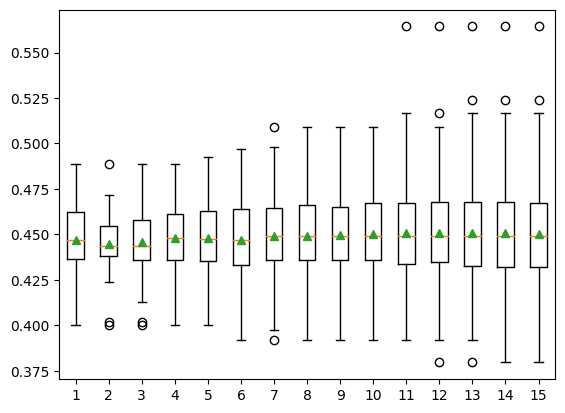

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=20)
 scores_knn_8 = cross_val_score(model, marriage_factors_features, marriage_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_8
repeats = range(1,16)
results_knn_8 = list()
for r in repeats:
 scores_knn_8 = evaluate_model(marriage_factors_features, marriage_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_8), sem(scores_knn_8)))
 results_knn_8.append(scores_knn_8)

plt.boxplot(results_knn_8, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_8 = RepeatedKFold(n_splits=10, n_repeats=8, random_state=1)
scores_f1 = cross_val_score(classifier_8, marriage_factors_features, marriage_factors_target, scoring='f1_macro', cv=cv_8, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_8, marriage_factors_features, marriage_factors_target, scoring='matthews_corrcoef', cv=cv_8, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.449 (0.026)
Matthews: 0.334 (0.057)


# Group 9: Domestic Factors

In [ ]:
domestic_factors_features = domestic_factors.iloc[:, :-1]
domestic_factors_target = domestic_factors.iloc[:, -1]
X_train_9, X_test_9, Y_train_9, Y_test_9 = train_test_split(domestic_factors_features, domestic_factors_target, test_size=0.2, random_state=1)

classifier_9 = KNeighborsClassifier(n_neighbors=9)
classifier_9.fit(X_train_9, Y_train_9)

#Starting f1 is 0.57, starting MCC is 0.48

y_pred_9 = classifier_9.predict(X_test_9)
print(classification_report(Y_test_9, y_pred_9))
print('Matthews:',matthews_corrcoef(Y_test_9, y_pred_9))

              precision    recall  f1-score   support

        High       0.58      0.69      0.63        62
         Low       0.82      0.93      0.87       270
      Medium       0.45      0.13      0.21        67

    accuracy                           0.76       399
   macro avg       0.62      0.59      0.57       399
weighted avg       0.72      0.76      0.72       399

Matthews: 0.47572260642453373


>1 f1=0.5725 se=0.010
>2 f1=0.5777 se=0.007
>3 f1=0.5772 se=0.006
>4 f1=0.5774 se=0.005
>5 f1=0.5769 se=0.005
>6 f1=0.5759 se=0.004
>7 f1=0.5776 se=0.004
>8 f1=0.5773 se=0.004
>9 f1=0.5779 se=0.004
>10 f1=0.5781 se=0.003
>11 f1=0.5786 se=0.003
>12 f1=0.5787 se=0.003
>13 f1=0.5788 se=0.003
>14 f1=0.5788 se=0.003
>15 f1=0.5788 se=0.003


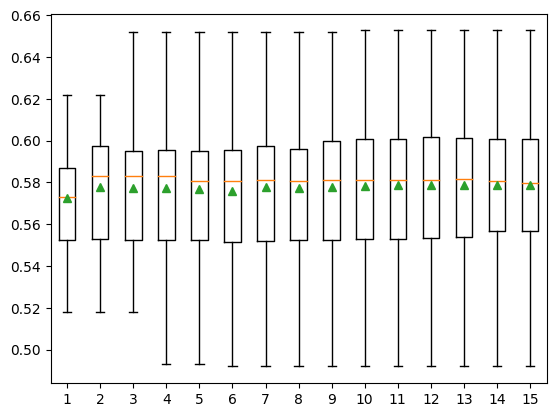

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=9)
 scores_knn_9 = cross_val_score(model,domestic_factors_features, domestic_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_9
repeats = range(1,16)
results_knn_9 = list()
for r in repeats:
 scores_knn_9 = evaluate_model(domestic_factors_features, domestic_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_9), sem(scores_knn_9)))
 results_knn_9.append(scores_knn_9)

plt.boxplot(results_knn_9, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_9 = KNeighborsClassifier(n_neighbors=9)
skf_knn_9 = RepeatedStratifiedKFold(n_splits=10, n_repeats=15, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_9.split(domestic_factors_features, domestic_factors_target):
    x_train_fold, x_test_fold = domestic_factors_features.iloc[train_index], domestic_factors_features.iloc[test_index]
    y_train_fold, y_test_fold = domestic_factors_target[train_index], domestic_factors_target[test_index]
    classifier_sk_9.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_9.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_9.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_9, domestic_factors_features, domestic_factors_target, scoring='f1_macro', cv=skf_knn_9, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_9, domestic_factors_features, domestic_factors_target, scoring='matthews_corrcoef', cv=skf_knn_9, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 81.90954773869346 %

Minimum Accuracy: 72.5 %

Overall Accuracy: 77.23874371859296 %

Standard Deviation is: 0.018861096513088843
F1: 0.579 (0.033)
Matthews: 0.510 (0.043)


>1 f1=0.5792 se=0.016
>2 f1=0.5776 se=0.008
>3 f1=0.5752 se=0.006
>4 f1=0.5740 se=0.006
>5 f1=0.5727 se=0.005
>6 f1=0.5718 se=0.005
>7 f1=0.5727 se=0.004
>8 f1=0.5728 se=0.004
>9 f1=0.5735 se=0.004
>10 f1=0.5735 se=0.004
>11 f1=0.5740 se=0.004
>12 f1=0.5740 se=0.003
>13 f1=0.5733 se=0.003
>14 f1=0.5742 se=0.003
>15 f1=0.5749 se=0.003


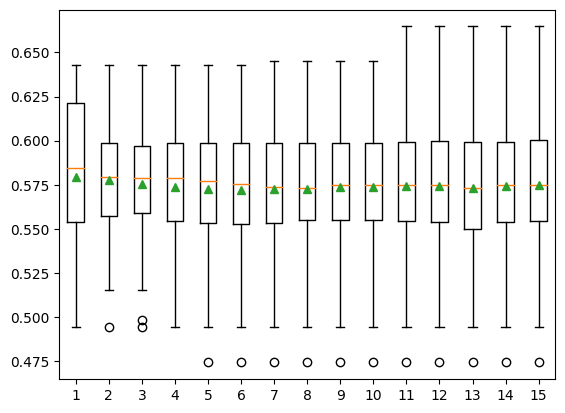

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=9)
 scores_knn_9 = cross_val_score(model,domestic_factors_features, domestic_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_9
repeats = range(1,16)
results_knn_9 = list()
for r in repeats:
 scores_knn_9 = evaluate_model(domestic_factors_features, domestic_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_9), sem(scores_knn_9)))
 results_knn_9.append(scores_knn_9)

plt.boxplot(results_knn_9, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_9 = RepeatedKFold(n_splits=10, n_repeats=12, random_state=1)
scores_f1 = cross_val_score(classifier_9, domestic_factors_features, domestic_factors_target, scoring='f1_macro', cv=cv_9, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_9, domestic_factors_features, domestic_factors_target, scoring='matthews_corrcoef', cv=cv_9, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.574 (0.037)
Matthews: 0.507 (0.052)


# Group 10: Immigration

In [ ]:
immigration_features = immigration.iloc[:, :-1]
immigration_target = immigration.iloc[:, -1]
X_train_10, X_test_10, Y_train_10, Y_test_10 = train_test_split(immigration_features, immigration_target, test_size=0.2, random_state=1)

classifier_10 = KNeighborsClassifier(n_neighbors=3)
classifier_10.fit(X_train_10, Y_train_10)

#Starting f1 is 0.44, starting MCC is 0.23

y_pred_10 = classifier_10.predict(X_test_10)
print(classification_report(Y_test_10, y_pred_10))
print('Matthews:',matthews_corrcoef(Y_test_10, y_pred_10))

              precision    recall  f1-score   support

        High       0.35      0.47      0.40        62
         Low       0.75      0.82      0.79       270
      Medium       0.30      0.09      0.14        67

    accuracy                           0.64       399
   macro avg       0.47      0.46      0.44       399
weighted avg       0.61      0.64      0.62       399

Matthews: 0.23009515476428155


>1 f1=0.4075 se=0.013
>2 f1=0.4068 se=0.008
>3 f1=0.4066 se=0.006
>4 f1=0.4052 se=0.006
>5 f1=0.4064 se=0.005
>6 f1=0.4076 se=0.005
>7 f1=0.4080 se=0.005
>8 f1=0.4075 se=0.004
>9 f1=0.4081 se=0.004
>10 f1=0.4072 se=0.004
>11 f1=0.4089 se=0.004
>12 f1=0.4094 se=0.004
>13 f1=0.4091 se=0.003
>14 f1=0.4090 se=0.003
>15 f1=0.4092 se=0.003


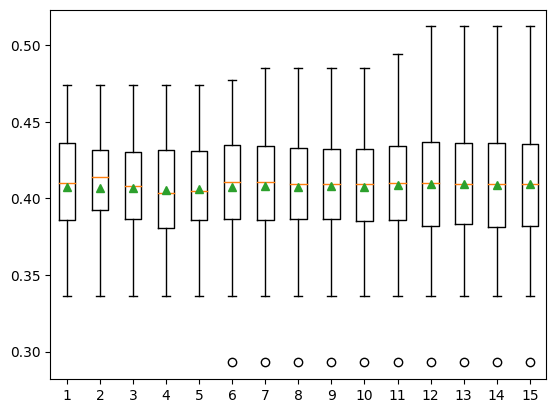

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_10 = cross_val_score(model, immigration_features, immigration_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_10
repeats = range(1,16)
results_knn_10 = list()
for r in repeats:
 scores_knn_10 = evaluate_model(immigration_features, immigration_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_10), sem(scores_knn_10)))
 results_knn_10.append(scores_knn_10)

plt.boxplot(results_knn_10, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_10 = KNeighborsClassifier(n_neighbors=3)
skf_knn_10 = RepeatedStratifiedKFold(n_splits=10, n_repeats=13, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_10.split(immigration_features, immigration_target):
    x_train_fold, x_test_fold = immigration_features.iloc[train_index], immigration_features.iloc[test_index]
    y_train_fold, y_test_fold = immigration_target[train_index], immigration_target[test_index]
    classifier_sk_10.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_10.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_10.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_10, immigration_features, immigration_target, scoring='f1_macro', cv=skf_knn_10, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_10, immigration_features, immigration_target, scoring='matthews_corrcoef', cv=skf_knn_10, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 67.33668341708542 %

Minimum Accuracy: 51.5 %

Overall Accuracy: 61.0713567839196 %

Standard Deviation is: 0.03371851729693558
F1: 0.409 (0.038)
Matthews: 0.171 (0.067)


>1 f1=0.4107 se=0.010
>2 f1=0.4113 se=0.007
>3 f1=0.4105 se=0.006
>4 f1=0.4096 se=0.006
>5 f1=0.4091 se=0.005
>6 f1=0.4100 se=0.005
>7 f1=0.4098 se=0.004
>8 f1=0.4094 se=0.004
>9 f1=0.4077 se=0.004
>10 f1=0.4074 se=0.003
>11 f1=0.4071 se=0.003
>12 f1=0.4071 se=0.003
>13 f1=0.4073 se=0.003
>14 f1=0.4079 se=0.003
>15 f1=0.4084 se=0.003


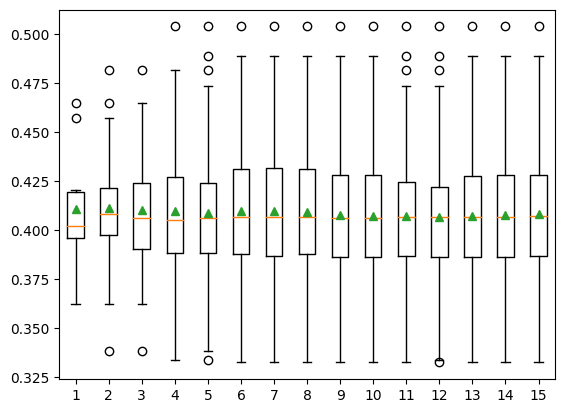

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_10 = cross_val_score(model, immigration_features, immigration_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_10
repeats = range(1,16)
results_knn_10 = list()
for r in repeats:
 scores_knn_10 = evaluate_model(immigration_features, immigration_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_10), sem(scores_knn_10)))
 results_knn_10.append(scores_knn_10)

plt.boxplot(results_knn_10, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_10 = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores_f1 = cross_val_score(classifier_10, immigration_features, immigration_target, scoring='f1_macro', cv=cv_10, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_10, immigration_features, immigration_target, scoring='matthews_corrcoef', cv=cv_10, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.407 (0.033)
Matthews: 0.174 (0.056)


# Group 11: English Proficiency



In [ ]:
english_proficiency_features = english_proficiency.iloc[:, :-1]
english_proficiency_target = english_proficiency.iloc[:, -1]
X_train_11, X_test_11, Y_train_11, Y_test_11 = train_test_split(english_proficiency_features, english_proficiency_target, test_size=0.2, random_state=1)

classifier_11 = KNeighborsClassifier(n_neighbors=7)
classifier_11.fit(X_train_11, Y_train_11)

#Starting f1 is 0.42, starting MCC is 0.20

y_pred_11 = classifier_11.predict(X_test_11)
print(classification_report(Y_test_11, y_pred_11))
print('Matthews:',matthews_corrcoef(Y_test_11, y_pred_11))

              precision    recall  f1-score   support

        High       0.37      0.32      0.34        62
         Low       0.73      0.89      0.80       270
      Medium       0.29      0.07      0.12        67

    accuracy                           0.66       399
   macro avg       0.46      0.43      0.42       399
weighted avg       0.60      0.66      0.61       399

Matthews: 0.20002387427440038


>1 f1=0.3922 se=0.011
>2 f1=0.3969 se=0.007
>3 f1=0.3930 se=0.006
>4 f1=0.3907 se=0.005
>5 f1=0.3966 se=0.005
>6 f1=0.3936 se=0.005
>7 f1=0.3926 se=0.004
>8 f1=0.3928 se=0.004
>9 f1=0.3935 se=0.004
>10 f1=0.3942 se=0.004
>11 f1=0.3931 se=0.003
>12 f1=0.3931 se=0.003
>13 f1=0.3921 se=0.003
>14 f1=0.3918 se=0.003
>15 f1=0.3913 se=0.003


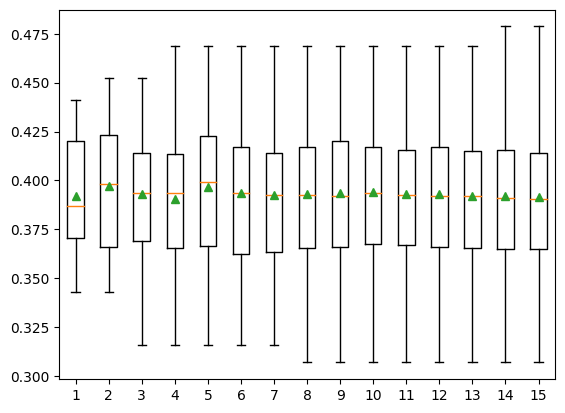

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=7)
 scores_knn_11 = cross_val_score(model, english_proficiency_features, english_proficiency_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_11
repeats = range(1,16)
results_knn_11 = list()
for r in repeats:
 scores_knn_11 = evaluate_model(english_proficiency_features, english_proficiency_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_11), sem(scores_knn_11)))
 results_knn_11.append(scores_knn_11)

plt.boxplot(results_knn_11, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_11 = KNeighborsClassifier(n_neighbors=7)
skf_knn_11 = RepeatedStratifiedKFold(n_splits=10, n_repeats=11, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_11.split(english_proficiency_features, english_proficiency_target):
    x_train_fold, x_test_fold = english_proficiency_features.iloc[train_index], english_proficiency_features.iloc[test_index]
    y_train_fold, y_test_fold = english_proficiency_target[train_index], english_proficiency_target[test_index]
    classifier_sk_11.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_11.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_11.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_11, english_proficiency_features, english_proficiency_target, scoring='f1_macro', cv=skf_knn_11, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_11, english_proficiency_features, english_proficiency_target, scoring='matthews_corrcoef', cv=skf_knn_11, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 69.0 %

Minimum Accuracy: 56.78391959798995 %

Overall Accuracy: 64.52476016445867 %

Standard Deviation is: 0.02438029690011901
F1: 0.393 (0.036)
Matthews: 0.163 (0.057)


>1 f1=0.3943 se=0.012
>2 f1=0.3867 se=0.010
>3 f1=0.3835 se=0.008
>4 f1=0.3851 se=0.006
>5 f1=0.3834 se=0.005
>6 f1=0.3835 se=0.005
>7 f1=0.3821 se=0.004
>8 f1=0.3838 se=0.004
>9 f1=0.3862 se=0.004
>10 f1=0.3860 se=0.003
>11 f1=0.3877 se=0.003
>12 f1=0.3886 se=0.003
>13 f1=0.3882 se=0.003
>14 f1=0.3884 se=0.003
>15 f1=0.3887 se=0.003


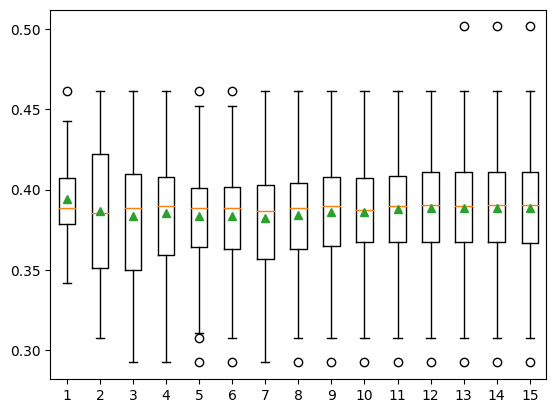

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=7)
 scores_knn_11 = cross_val_score(model, english_proficiency_features, english_proficiency_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_11
repeats = range(1,16)
results_knn_11 = list()
for r in repeats:
 scores_knn_11 = evaluate_model(english_proficiency_features, english_proficiency_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_11), sem(scores_knn_11)))
 results_knn_11.append(scores_knn_11)

plt.boxplot(results_knn_11, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_11 = RepeatedKFold(n_splits=10, n_repeats=13, random_state=1)
scores_f1 = cross_val_score(classifier_11, english_proficiency_features, english_proficiency_target, scoring='f1_macro', cv=cv_11, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_11, english_proficiency_features, english_proficiency_target, scoring='matthews_corrcoef', cv=cv_11, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.388 (0.034)
Matthews: 0.155 (0.055)


# Group 12: Housing Factors

In [ ]:
housing_factors_features = housing_factors.iloc[:, :-1]
housing_factors_target = housing_factors.iloc[:, -1]
X_train_12, X_test_12, Y_train_12, Y_test_12 = train_test_split(housing_factors_features, housing_factors_target, test_size=0.2, random_state=1)

classifier_12 = KNeighborsClassifier(n_neighbors=12)
classifier_12.fit(X_train_12, Y_train_12)

#Starting f1 is 0.58, starting MCC is 0.48

y_pred_12 = classifier_12.predict(X_test_12)
print(classification_report(Y_test_12, y_pred_12))
print('Matthews:',matthews_corrcoef(Y_test_12, y_pred_12))

              precision    recall  f1-score   support

        High       0.59      0.68      0.63        62
         Low       0.83      0.93      0.87       270
      Medium       0.42      0.15      0.22        67

    accuracy                           0.76       399
   macro avg       0.61      0.59      0.58       399
weighted avg       0.72      0.76      0.73       399

Matthews: 0.47505750255066576


>1 f1=0.5400 se=0.009
>2 f1=0.5456 se=0.008
>3 f1=0.5426 se=0.006
>4 f1=0.5424 se=0.006
>5 f1=0.5413 se=0.005
>6 f1=0.5421 se=0.004
>7 f1=0.5441 se=0.004
>8 f1=0.5430 se=0.004
>9 f1=0.5431 se=0.004
>10 f1=0.5435 se=0.004
>11 f1=0.5428 se=0.003
>12 f1=0.5423 se=0.003
>13 f1=0.5421 se=0.003
>14 f1=0.5421 se=0.003
>15 f1=0.5418 se=0.003


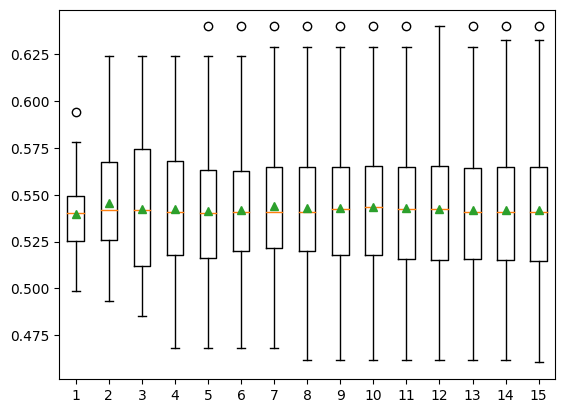

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=12)
 scores_knn_12 = cross_val_score(model, housing_factors_features, housing_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_12
repeats = range(1,16)
results_knn_12 = list()
for r in repeats:
 scores_knn_12 = evaluate_model(housing_factors_features, housing_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_12), sem(scores_knn_12)))
 results_knn_12.append(scores_knn_12)

plt.boxplot(results_knn_12, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_12 = KNeighborsClassifier(n_neighbors=12)
skf_knn_12 = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_12.split(housing_factors_features, housing_factors_target):
    x_train_fold, x_test_fold = housing_factors_features.iloc[train_index], housing_factors_features.iloc[test_index]
    y_train_fold, y_test_fold = housing_factors_target[train_index], housing_factors_target[test_index]
    classifier_sk_12.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_12.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_12.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_12, housing_factors_features, housing_factors_target, scoring='f1_macro', cv=skf_knn_12, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_12, housing_factors_features, housing_factors_target, scoring='matthews_corrcoef', cv=skf_knn_12, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 79.39698492462311 %

Minimum Accuracy: 70.5 %

Overall Accuracy: 75.27604690117252 %

Standard Deviation is: 0.02087136036046615
F1: 0.542 (0.036)
Matthews: 0.460 (0.050)


>1 f1=0.5372 se=0.011
>2 f1=0.5397 se=0.008
>3 f1=0.5383 se=0.007
>4 f1=0.5376 se=0.006
>5 f1=0.5366 se=0.005
>6 f1=0.5368 se=0.005
>7 f1=0.5366 se=0.004
>8 f1=0.5380 se=0.004
>9 f1=0.5362 se=0.004
>10 f1=0.5352 se=0.004
>11 f1=0.5363 se=0.004
>12 f1=0.5359 se=0.003
>13 f1=0.5358 se=0.003
>14 f1=0.5361 se=0.003
>15 f1=0.5360 se=0.003


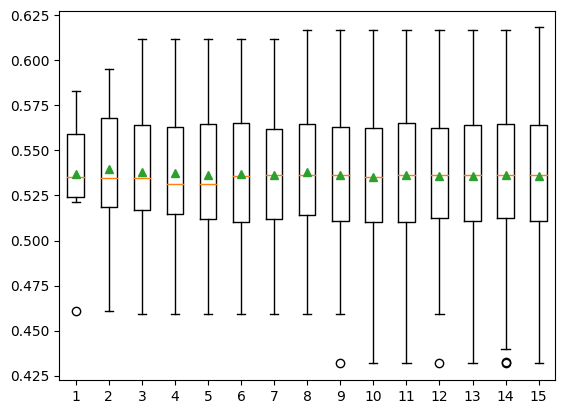

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=12)
 scores_knn_12 = cross_val_score(model, housing_factors_features, housing_factors_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_12
repeats = range(1,16)
results_knn_12 = list()
for r in repeats:
 scores_knn_12 = evaluate_model(housing_factors_features, housing_factors_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_12), sem(scores_knn_12)))
 results_knn_12.append(scores_knn_12)

plt.boxplot(results_knn_12, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_12 = RepeatedKFold(n_splits=10, n_repeats=11, random_state=1)
scores_f1 = cross_val_score(classifier_12, housing_factors_features, housing_factors_target, scoring='f1_macro', cv=cv_12, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_12, housing_factors_features, housing_factors_target, scoring='matthews_corrcoef', cv=cv_12, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.536 (0.038)
Matthews: 0.453 (0.056)


# Group 13: Housing Cost

In [ ]:
housing_cost_features = housing_cost.iloc[:, :-1]
housing_cost_target = housing_cost.iloc[:, -1]
X_train_13, X_test_13, Y_train_13, Y_test_13 = train_test_split(housing_cost_features, housing_cost_target, test_size=0.2, random_state=1)

classifier_13 = KNeighborsClassifier(n_neighbors=3)
classifier_13.fit(X_train_13, Y_train_13)

#Starting f1 is 0.44, starting MCC is 0.23

y_pred_13 = classifier_13.predict(X_test_13)
print(classification_report(Y_test_13, y_pred_13))
print('Matthews:',matthews_corrcoef(Y_test_13, y_pred_13))

              precision    recall  f1-score   support

        High       0.29      0.47      0.36        62
         Low       0.79      0.77      0.78       270
      Medium       0.26      0.13      0.18        67

    accuracy                           0.62       399
   macro avg       0.45      0.46      0.44       399
weighted avg       0.62      0.62      0.61       399

Matthews: 0.2346146708032485


>1 f1=0.4378 se=0.011
>2 f1=0.4398 se=0.006
>3 f1=0.4380 se=0.005
>4 f1=0.4401 se=0.004
>5 f1=0.4405 se=0.004
>6 f1=0.4393 se=0.004
>7 f1=0.4402 se=0.004
>8 f1=0.4399 se=0.003
>9 f1=0.4389 se=0.003
>10 f1=0.4376 se=0.003
>11 f1=0.4382 se=0.003
>12 f1=0.4374 se=0.003
>13 f1=0.4371 se=0.003
>14 f1=0.4371 se=0.003
>15 f1=0.4375 se=0.003


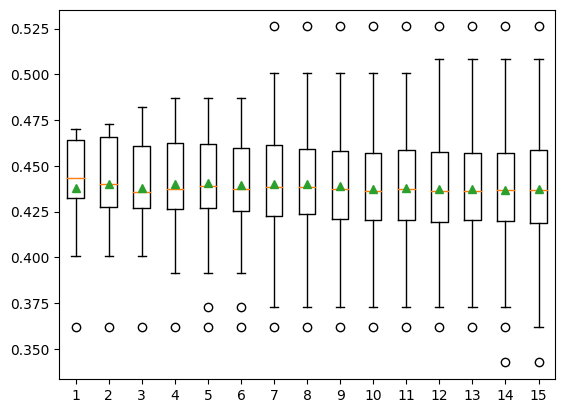

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_13 = cross_val_score(model, housing_cost_features, housing_cost_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_13
repeats = range(1,16)
results_knn_13 = list()
for r in repeats:
 scores_knn_13 = evaluate_model(housing_cost_features, housing_cost_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_13), sem(scores_knn_13)))
 results_knn_13.append(scores_knn_13)

plt.boxplot(results_knn_13, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_13 = KNeighborsClassifier(n_neighbors=3)
skf_knn_13 = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_13.split(housing_cost_features, housing_cost_target):
    x_train_fold, x_test_fold = housing_cost_features.iloc[train_index], housing_cost_features.iloc[test_index]
    y_train_fold, y_test_fold = housing_cost_target[train_index], housing_cost_target[test_index]
    classifier_sk_13.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_13.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_13.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_13, housing_cost_features, housing_cost_target, scoring='f1_macro', cv=skf_knn_13, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_13, housing_cost_features, housing_cost_target, scoring='matthews_corrcoef', cv=skf_knn_13, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 69.34673366834171 %

Minimum Accuracy: 58.5 %

Overall Accuracy: 63.25057788944724 %

Standard Deviation is: 0.023761699303002717
F1: 0.438 (0.029)
Matthews: 0.243 (0.048)


>1 f1=0.4278 se=0.008
>2 f1=0.4336 se=0.006
>3 f1=0.4319 se=0.005
>4 f1=0.4338 se=0.004
>5 f1=0.4339 se=0.004
>6 f1=0.4328 se=0.004
>7 f1=0.4333 se=0.003
>8 f1=0.4334 se=0.003
>9 f1=0.4342 se=0.003
>10 f1=0.4333 se=0.003
>11 f1=0.4339 se=0.003
>12 f1=0.4347 se=0.003
>13 f1=0.4340 se=0.003
>14 f1=0.4335 se=0.003
>15 f1=0.4333 se=0.003


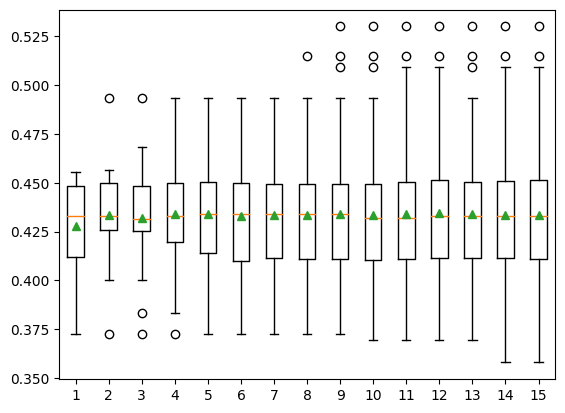

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_13 = cross_val_score(model, housing_cost_features, housing_cost_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_13
repeats = range(1,16)
results_knn_13 = list()
for r in repeats:
 scores_knn_13 = evaluate_model(housing_cost_features, housing_cost_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_13), sem(scores_knn_13)))
 results_knn_13.append(scores_knn_13)

plt.boxplot(results_knn_13, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_13 = RepeatedKFold(n_splits=10, n_repeats=7, random_state=1)
scores_f1 = cross_val_score(classifier_13, housing_cost_features, housing_cost_target, scoring='f1_macro', cv=cv_13, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_13, housing_cost_features, housing_cost_target, scoring='matthews_corrcoef', cv=cv_13, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.433 (0.028)
Matthews: 0.241 (0.044)


# Group 14: Unhoused

In [ ]:
unhoused_features = unhoused.iloc[:, :-1]
unhoused_target = unhoused.iloc[:, -1]
X_train_14, X_test_14, Y_train_14, Y_test_14 = train_test_split(unhoused_features, unhoused_target, test_size=0.2, random_state=1)

classifier_14 = KNeighborsClassifier(n_neighbors=9)
classifier_14.fit(X_train_14, Y_train_14)

#Starting f1 is 0.52, starting MCC is 0.39

y_pred_14 = classifier_14.predict(X_test_14)
print(classification_report(Y_test_14, y_pred_14))
print('Matthews:',matthews_corrcoef(Y_test_14, y_pred_14))

              precision    recall  f1-score   support

        High       0.54      0.45      0.49        62
         Low       0.77      0.96      0.85       270
      Medium       0.80      0.12      0.21        67

    accuracy                           0.74       399
   macro avg       0.70      0.51      0.52       399
weighted avg       0.74      0.74      0.69       399

Matthews: 0.3880183407634416


>1 f1=0.4575 se=0.012
>2 f1=0.4603 se=0.009
>3 f1=0.4604 se=0.007
>4 f1=0.4614 se=0.006
>5 f1=0.4607 se=0.006
>6 f1=0.4613 se=0.005
>7 f1=0.4579 se=0.006
>8 f1=0.4567 se=0.005
>9 f1=0.4571 se=0.005
>10 f1=0.4571 se=0.005
>11 f1=0.4576 se=0.004
>12 f1=0.4591 se=0.004
>13 f1=0.4594 se=0.004
>14 f1=0.4595 se=0.004
>15 f1=0.4588 se=0.004


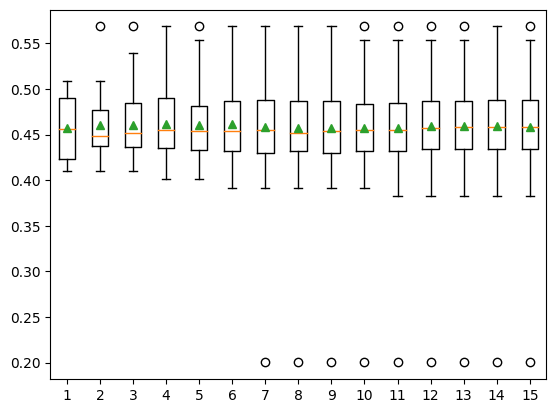

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=9)
 scores_knn_14 = cross_val_score(model, unhoused_features, unhoused_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_14
repeats = range(1,16)
results_knn_14 = list()
for r in repeats:
 scores_knn_14 = evaluate_model(unhoused_features, unhoused_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_14), sem(scores_knn_14)))
 results_knn_14.append(scores_knn_14)

plt.boxplot(results_knn_14, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_14 = KNeighborsClassifier(n_neighbors=9)
skf_knn_14 = RepeatedStratifiedKFold(n_splits=10, n_repeats=14, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_14.split(unhoused_features, unhoused_target):
    x_train_fold, x_test_fold = unhoused_features.iloc[train_index], unhoused_features.iloc[test_index]
    y_train_fold, y_test_fold = unhoused_target[train_index], unhoused_target[test_index]
    classifier_sk_14.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_14.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_14.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_14, unhoused_features, unhoused_target, scoring='f1_macro', cv=skf_knn_14, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_14, unhoused_features, unhoused_target, scoring='matthews_corrcoef', cv=skf_knn_14, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 74.87437185929649 %

Minimum Accuracy: 23.115577889447238 %

Overall Accuracy: 69.93111988513998 %

Standard Deviation is: 0.047456935359396636
F1: 0.459 (0.044)
Matthews: 0.303 (0.071)


>1 f1=0.4533 se=0.010
>2 f1=0.4571 se=0.008
>3 f1=0.4601 se=0.008
>4 f1=0.4611 se=0.007
>5 f1=0.4609 se=0.005
>6 f1=0.4593 se=0.005
>7 f1=0.4591 se=0.005
>8 f1=0.4587 se=0.004
>9 f1=0.4583 se=0.004
>10 f1=0.4591 se=0.004
>11 f1=0.4595 se=0.003
>12 f1=0.4593 se=0.003
>13 f1=0.4597 se=0.003
>14 f1=0.4594 se=0.003
>15 f1=0.4596 se=0.003


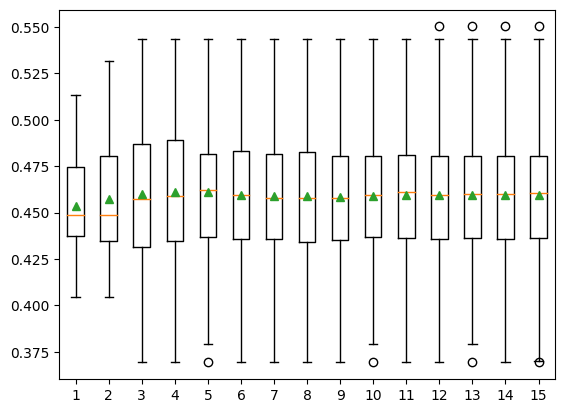

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=9)
 scores_knn_14 = cross_val_score(model, unhoused_features, unhoused_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_14
repeats = range(1,16)
results_knn_14 = list()
for r in repeats:
 scores_knn_14 = evaluate_model(unhoused_features, unhoused_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_14), sem(scores_knn_14)))
 results_knn_14.append(scores_knn_14)

plt.boxplot(results_knn_14, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_14 = RepeatedKFold(n_splits=10, n_repeats=9, random_state=1)
scores_f1 = cross_val_score(classifier_14, unhoused_features, unhoused_target, scoring='f1_macro', cv=cv_14, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_14, unhoused_features, unhoused_target, scoring='matthews_corrcoef', cv=cv_14, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.458 (0.037)
Matthews: 0.299 (0.059)


# Group 15: Mobility

In [ ]:
mobility_features = mobility.iloc[:, :-1]
mobility_target = mobility.iloc[:, -1]
X_train_15, X_test_15, Y_train_15, Y_test_15 = train_test_split(mobility_features, mobility_target, test_size=0.2, random_state=1)

classifier_15 = KNeighborsClassifier(n_neighbors=3)
classifier_15.fit(X_train_15, Y_train_15)

#Starting f1 is 0.44, starting MCC is 0.24

y_pred_15 = classifier_15.predict(X_test_15)
print(classification_report(Y_test_15, y_pred_15))
print('Matthews:',matthews_corrcoef(Y_test_15, y_pred_15))

              precision    recall  f1-score   support

        High       0.31      0.50      0.38        62
         Low       0.77      0.78      0.77       270
      Medium       0.31      0.12      0.17        67

    accuracy                           0.62       399
   macro avg       0.46      0.47      0.44       399
weighted avg       0.62      0.62      0.61       399

Matthews: 0.23520868734938197


>1 f1=0.4049 se=0.009
>2 f1=0.4047 se=0.005
>3 f1=0.4075 se=0.006
>4 f1=0.4097 se=0.005
>5 f1=0.4092 se=0.005
>6 f1=0.4093 se=0.004
>7 f1=0.4094 se=0.004
>8 f1=0.4083 se=0.004
>9 f1=0.4087 se=0.003
>10 f1=0.4084 se=0.003
>11 f1=0.4086 se=0.003
>12 f1=0.4090 se=0.003
>13 f1=0.4092 se=0.003
>14 f1=0.4093 se=0.003
>15 f1=0.4094 se=0.003


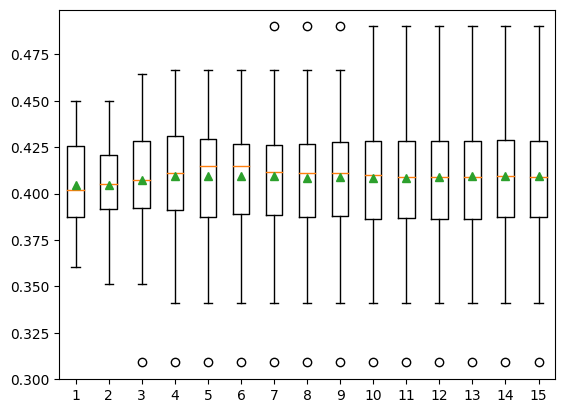

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_15 = cross_val_score(model, mobility_features, mobility_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_15
repeats = range(1,16)
results_knn_15 = list()
for r in repeats:
 scores_knn_15 = evaluate_model(mobility_features, mobility_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_15), sem(scores_knn_15)))
 results_knn_15.append(scores_knn_15)

plt.boxplot(results_knn_15, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_15 = KNeighborsClassifier(n_neighbors=3)
skf_knn_15 = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_15.split(mobility_features, mobility_target):
    x_train_fold, x_test_fold = mobility_features.iloc[train_index], mobility_features.iloc[test_index]
    y_train_fold, y_test_fold = mobility_target[train_index], mobility_target[test_index]
    classifier_sk_15.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_15.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_15.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_15, mobility_features, mobility_target, scoring='f1_macro', cv=skf_knn_15, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_15, mobility_features, mobility_target, scoring='matthews_corrcoef', cv=skf_knn_15, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 67.5 %

Minimum Accuracy: 53.768844221105525 %

Overall Accuracy: 61.38387772194304 %

Standard Deviation is: 0.02447830417213262
F1: 0.409 (0.032)
Matthews: 0.179 (0.051)


>1 f1=0.4094 se=0.013
>2 f1=0.4100 se=0.008
>3 f1=0.4087 se=0.007
>4 f1=0.4086 se=0.005
>5 f1=0.4076 se=0.005
>6 f1=0.4048 se=0.005
>7 f1=0.4043 se=0.004
>8 f1=0.4028 se=0.004
>9 f1=0.4034 se=0.003
>10 f1=0.4034 se=0.003
>11 f1=0.4030 se=0.003
>12 f1=0.4032 se=0.003
>13 f1=0.4023 se=0.003
>14 f1=0.4034 se=0.003
>15 f1=0.4029 se=0.003


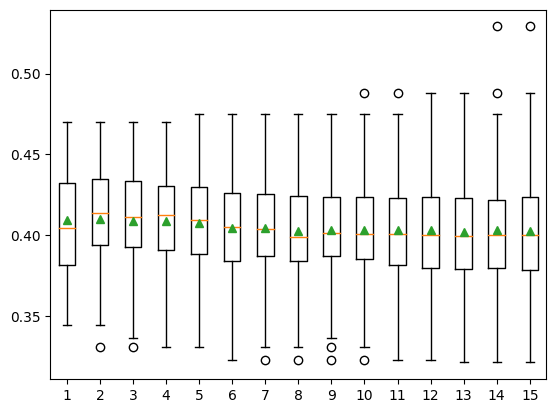

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_15 = cross_val_score(model, mobility_features, mobility_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_15
repeats = range(1,16)
results_knn_15 = list()
for r in repeats:
 scores_knn_15 = evaluate_model(mobility_features, mobility_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_15), sem(scores_knn_15)))
 results_knn_15.append(scores_knn_15)

plt.boxplot(results_knn_15, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_15 = RepeatedKFold(n_splits=10, n_repeats=7, random_state=1)
scores_f1 = cross_val_score(classifier_15, mobility_features, mobility_target, scoring='f1_macro', cv=cv_15, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_15, mobility_features, mobility_target, scoring='matthews_corrcoef', cv=cv_15, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.404 (0.034)
Matthews: 0.171 (0.056)


# Group 16: Density

In [ ]:
density_features = density.iloc[:, :-1]
density_target = density.iloc[:, -1]
X_train_16, X_test_16, Y_train_16, Y_test_16 = train_test_split(density_features, density_target, test_size=0.2, random_state=1)

classifier_16 = KNeighborsClassifier(n_neighbors=33)
classifier_16.fit(X_train_16, Y_train_16)

#Starting f1 is 0.42, starting MCC is 0.29

y_pred_16 = classifier_16.predict(X_test_16)
print(classification_report(Y_test_16, y_pred_16))
print('Matthews:',matthews_corrcoef(Y_test_16, y_pred_16))

              precision    recall  f1-score   support

        High       0.64      0.34      0.44        62
         Low       0.72      0.97      0.83       270
      Medium       0.00      0.00      0.00        67

    accuracy                           0.71       399
   macro avg       0.45      0.44      0.42       399
weighted avg       0.59      0.71      0.63       399

Matthews: 0.2868789244207991


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>1 f1=0.3974 se=0.011
>2 f1=0.3974 se=0.006
>3 f1=0.3973 se=0.004
>4 f1=0.3972 se=0.004
>5 f1=0.3964 se=0.004
>6 f1=0.3959 se=0.004
>7 f1=0.3957 se=0.003
>8 f1=0.3954 se=0.003
>9 f1=0.3952 se=0.003
>10 f1=0.3952 se=0.003
>11 f1=0.3951 se=0.003
>12 f1=0.3951 se=0.003
>13 f1=0.3952 se=0.002
>14 f1=0.3954 se=0.002
>15 f1=0.3956 se=0.002


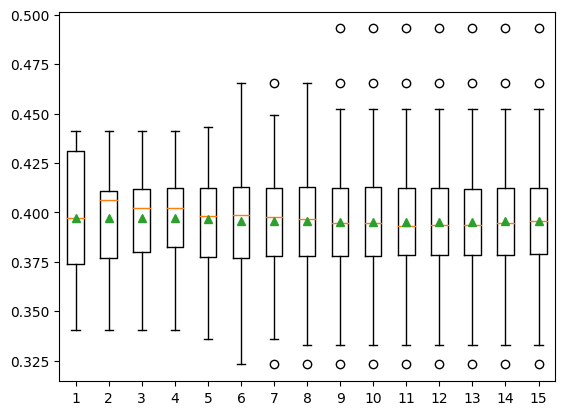

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=33)
 scores_knn_16 = cross_val_score(model, density_features, density_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_16
repeats = range(1,16)
results_knn_16 = list()
for r in repeats:
 scores_knn_16 = evaluate_model(density_features, density_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_16), sem(scores_knn_16)))
 results_knn_16.append(scores_knn_16)

plt.boxplot(results_knn_16, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_16 = KNeighborsClassifier(n_neighbors=33)
skf_knn_16 = RepeatedStratifiedKFold(n_splits=10, n_repeats=9, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_16.split(density_features, density_target):
    x_train_fold, x_test_fold = density_features.iloc[train_index], density_features.iloc[test_index]
    y_train_fold, y_test_fold = density_target[train_index], density_target[test_index]
    classifier_sk_16.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_16.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_16.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_16, density_features, density_target, scoring='f1_macro', cv=skf_knn_16, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_16, density_features, density_target, scoring='matthews_corrcoef', cv=skf_knn_16, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 75.5 %

Minimum Accuracy: 66.0 %

Overall Accuracy: 69.99352317141262 %

Standard Deviation is: 0.016112622564023297
F1: 0.395 (0.030)
Matthews: 0.249 (0.060)


>1 f1=0.3993 se=0.009
>2 f1=0.3959 se=0.006
>3 f1=0.3947 se=0.005
>4 f1=0.3953 se=0.005
>5 f1=0.3935 se=0.004
>6 f1=0.3939 se=0.004
>7 f1=0.3940 se=0.003
>8 f1=0.3939 se=0.003
>9 f1=0.3941 se=0.003
>10 f1=0.3946 se=0.003
>11 f1=0.3943 se=0.003
>12 f1=0.3938 se=0.003
>13 f1=0.3940 se=0.003
>14 f1=0.3940 se=0.003
>15 f1=0.3938 se=0.003


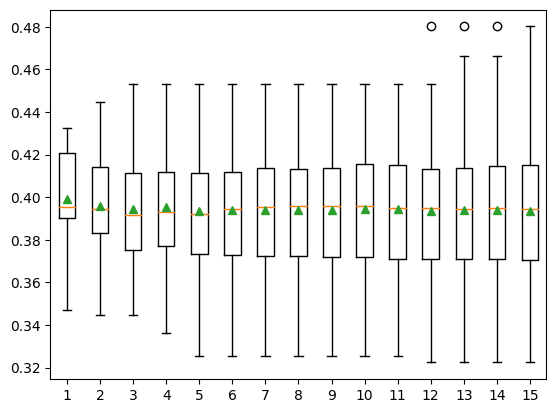

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=33)
 scores_knn_16 = cross_val_score(model, density_features, density_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_16
repeats = range(1,16)
results_knn_16 = list()
for r in repeats:
 scores_knn_16 = evaluate_model(density_features, density_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_16), sem(scores_knn_16)))
 results_knn_16.append(scores_knn_16)

plt.boxplot(results_knn_16, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_16 = RepeatedKFold(n_splits=10, n_repeats=11, random_state=1)
scores_f1 = cross_val_score(classifier_16, density_features, density_target, scoring='f1_macro', cv=cv_16, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_16, density_features, density_target, scoring='matthews_corrcoef', cv=cv_16, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.394 (0.028)
Matthews: 0.247 (0.060)


# Group 17: Transit

In [ ]:
transit_features = transit.iloc[:, :-1]
transit_target = transit.iloc[:, -1]
X_train_17, X_test_17, Y_train_17, Y_test_17 = train_test_split(transit_features, transit_target, test_size=0.2, random_state=1)

classifier_17 = KNeighborsClassifier(n_neighbors=6)
classifier_17.fit(X_train_17, Y_train_17)

#Starting f1 is 0.35, starting MCC is 0.14

y_pred_17 = classifier_17.predict(X_test_17)
print(classification_report(Y_test_17, y_pred_17))
print('Matthews:',matthews_corrcoef(Y_test_17, y_pred_17))

              precision    recall  f1-score   support

        High       0.33      0.11      0.17        62
         Low       0.70      0.96      0.81       270
      Medium       0.60      0.04      0.08        67

    accuracy                           0.68       399
   macro avg       0.54      0.37      0.35       399
weighted avg       0.62      0.68      0.59       399

Matthews: 0.13768026196224092


>1 f1=0.3247 se=0.013
>2 f1=0.3189 se=0.008
>3 f1=0.3183 se=0.006
>4 f1=0.3196 se=0.005
>5 f1=0.3179 se=0.004
>6 f1=0.3171 se=0.004
>7 f1=0.3180 se=0.003
>8 f1=0.3199 se=0.003
>9 f1=0.3189 se=0.003
>10 f1=0.3195 se=0.003
>11 f1=0.3181 se=0.003
>12 f1=0.3193 se=0.003
>13 f1=0.3196 se=0.003
>14 f1=0.3194 se=0.003
>15 f1=0.3189 se=0.003


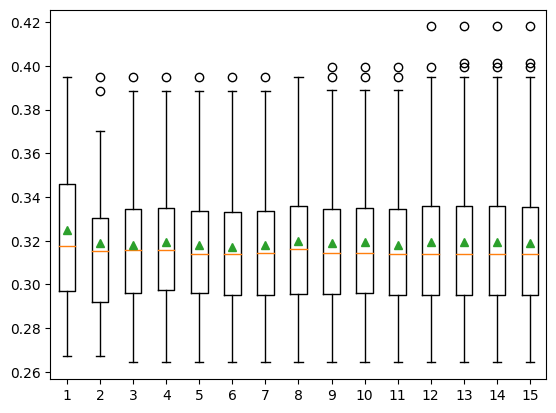

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=6)
 scores_knn_17 = cross_val_score(model, transit_features, transit_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_17
repeats = range(1,16)
results_knn_17 = list()
for r in repeats:
 scores_knn_17 = evaluate_model(transit_features, transit_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_17), sem(scores_knn_17)))
 results_knn_17.append(scores_knn_17)

plt.boxplot(results_knn_17, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_17 = KNeighborsClassifier(n_neighbors=6)
skf_knn_17 = RepeatedStratifiedKFold(n_splits=10, n_repeats=7, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_17.split(transit_features, transit_target):
    x_train_fold, x_test_fold = transit_features.iloc[train_index], transit_features.iloc[test_index]
    y_train_fold, y_test_fold = transit_target[train_index], transit_target[test_index]
    classifier_sk_17.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_17.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_17.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_17, transit_features, transit_target, scoring='f1_macro', cv=skf_knn_17, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_17, transit_features, transit_target, scoring='matthews_corrcoef', cv=skf_knn_17, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 67.33668341708542 %

Minimum Accuracy: 50.0 %

Overall Accuracy: 59.636109117013646 %

Standard Deviation is: 0.04129217768257133
F1: 0.318 (0.029)
Matthews: 0.021 (0.057)


>1 f1=0.3323 se=0.011
>2 f1=0.3197 se=0.008
>3 f1=0.3173 se=0.006
>4 f1=0.3175 se=0.005
>5 f1=0.3148 se=0.004
>6 f1=0.3134 se=0.004
>7 f1=0.3152 se=0.004
>8 f1=0.3149 se=0.003
>9 f1=0.3164 se=0.003
>10 f1=0.3165 se=0.003
>11 f1=0.3157 se=0.003
>12 f1=0.3173 se=0.003
>13 f1=0.3183 se=0.003
>14 f1=0.3193 se=0.003
>15 f1=0.3202 se=0.003


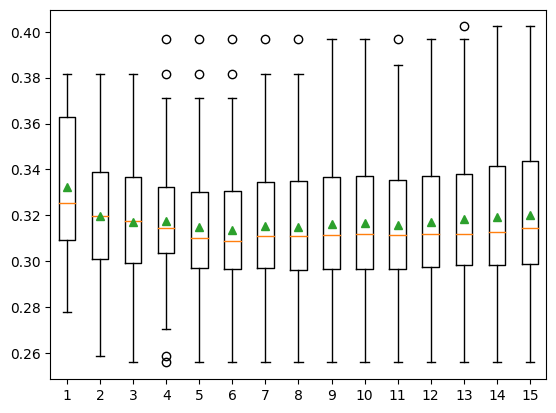

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=6)
 scores_knn_17 = cross_val_score(model, transit_features, transit_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_17
repeats = range(1,16)
results_knn_17 = list()
for r in repeats:
 scores_knn_17 = evaluate_model(transit_features, transit_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_17), sem(scores_knn_17)))
 results_knn_17.append(scores_knn_17)

plt.boxplot(results_knn_17, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_17 = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores_f1 = cross_val_score(classifier_17, transit_features, transit_target, scoring='f1_macro', cv=cv_17, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_17, transit_features, transit_target, scoring='matthews_corrcoef', cv=cv_17, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.316 (0.031)
Matthews: 0.015 (0.055)


#Group 18: Policing

In [ ]:
policing = policing.dropna()

In [ ]:
policing_features = policing.iloc[:, :-1]
policing_target = policing.iloc[:, -1]
X_train_18, X_test_18, Y_train_18, Y_test_18 = train_test_split(policing_features, policing_target, test_size=0.2, random_state=1)

classifier_18 = KNeighborsClassifier(n_neighbors=16)
classifier_18.fit(X_train_18, Y_train_18)

#Starting f1 is 0.54, starting MCC is 0.45

y_pred_18 = classifier_18.predict(X_test_18)
print(classification_report(Y_test_18, y_pred_18))
print('Matthews:',matthews_corrcoef(Y_test_18, y_pred_18))

              precision    recall  f1-score   support

        High       0.83      0.81      0.82        31
         Low       0.47      0.78      0.58        18
      Medium       0.50      0.13      0.21        15

    accuracy                           0.64        64
   macro avg       0.60      0.57      0.54        64
weighted avg       0.65      0.64      0.61        64

Matthews: 0.45054236893837146


>1 f1=0.5086 se=0.026
>2 f1=0.5178 se=0.017
>3 f1=0.5075 se=0.013
>4 f1=0.5048 se=0.011
>5 f1=0.4995 se=0.009
>6 f1=0.5001 se=0.009
>7 f1=0.5001 se=0.008
>8 f1=0.5029 se=0.007
>9 f1=0.5024 se=0.007
>10 f1=0.5043 se=0.007
>11 f1=0.5040 se=0.006
>12 f1=0.5042 se=0.006
>13 f1=0.5036 se=0.006
>14 f1=0.5023 se=0.006
>15 f1=0.5023 se=0.006


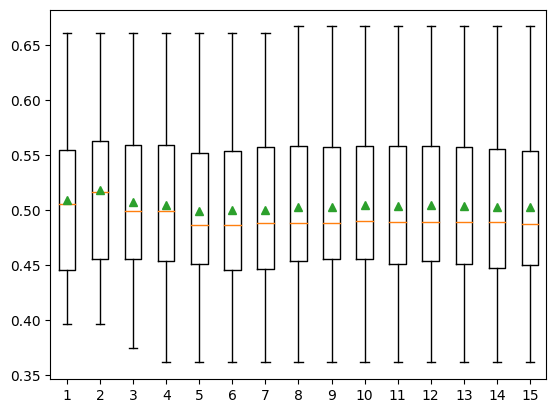

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=16)
 scores_knn_18 = cross_val_score(model, policing_features, policing_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_18
repeats = range(1,16)
results_knn_18 = list()
for r in repeats:
 scores_knn_18 = evaluate_model(policing_features, policing_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_18), sem(scores_knn_18)))
 results_knn_18.append(scores_knn_18)

plt.boxplot(results_knn_18, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
classifier_sk_18 = KNeighborsClassifier(n_neighbors=16)
skf_knn_18 = RepeatedStratifiedKFold(n_splits=10, n_repeats=18, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_18.split(policing_features, policing_target):
    x_train_fold, x_test_fold = policing_features.iloc[train_index],policing_features.iloc[test_index]
    y_train_fold, y_test_fold = policing_target.iloc[train_index], policing_target.iloc[test_index]
    classifier_sk_18.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_18.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_18.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_18, policing_features, policing_target, scoring='f1_macro', cv=skf_knn_18, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_18, policing_features, policing_target, scoring='matthews_corrcoef', cv=skf_knn_18, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 78.125 %

Minimum Accuracy: 40.625 %

Overall Accuracy: 64.1459453405018 %

Standard Deviation is: 0.06285999041114824
F1: 0.502 (0.069)
Matthews: 0.422 (0.105)


>1 f1=0.5016 se=0.018
>2 f1=0.5066 se=0.014
>3 f1=0.5040 se=0.017
>4 f1=0.5083 se=0.014
>5 f1=0.5068 se=0.012
>6 f1=0.5032 se=0.010
>7 f1=0.5020 se=0.009
>8 f1=0.4988 se=0.009
>9 f1=0.4977 se=0.008
>10 f1=0.4974 se=0.007
>11 f1=0.4982 se=0.007
>12 f1=0.5002 se=0.007
>13 f1=0.4991 se=0.006
>14 f1=0.5007 se=0.006
>15 f1=0.5014 se=0.006


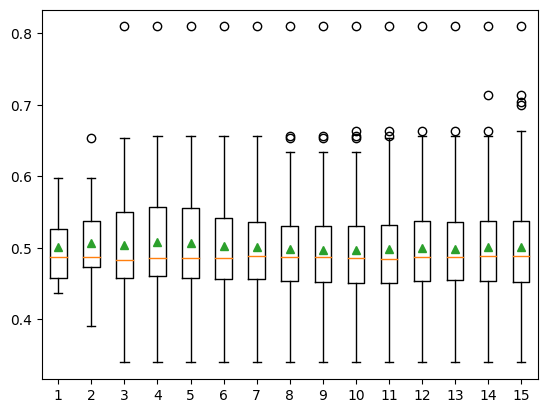

In [ ]:
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=16)
 scores_knn_18 = cross_val_score(model, policing_features, policing_target, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_18
repeats = range(1,16)
results_knn_18 = list()
for r in repeats:
 scores_knn_18 = evaluate_model(policing_features, policing_target, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_18), sem(scores_knn_18)))
 results_knn_18.append(scores_knn_18)

plt.boxplot(results_knn_18, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
cv_18 = RepeatedKFold(n_splits=10, n_repeats=13, random_state=1)
scores_f1 = cross_val_score(classifier_18, policing_features, policing_target, scoring='f1_macro', cv=cv_18, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_18, policing_features, policing_target, scoring='matthews_corrcoef', cv=cv_18, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

F1: 0.499 (0.073)
Matthews: 0.420 (0.110)
